In [1]:
import TNGFunctions as TNG
import PlotFunctions as plot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import MATH
import warnings
import os

from scipy.interpolate import interp1d
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import WMAP7
from matplotlib.lines import Line2D


plt.style.use('abhner.mplstyle')
np.seterr(divide='ignore') # ignore divide by zero


warnings.filterwarnings( "ignore")



In [2]:
# cosmological parameters
Omegam0 = 0.3089
h = 0.6774

#SIM TNG
SIMTNG = 'TNG50'

#Paths
dfTime = pd.read_csv(os.getenv("HOME")+'/TNG_Analyzes/SubhaloHistory/SNAPS_TIME.csv')
df_z0_Mstar_Range = TNG.extractDF('Sample', SIM=SIMTNG)
PaperII = TNG.extractDF('PaperII', SIM=SIMTNG)

# Fig. 1

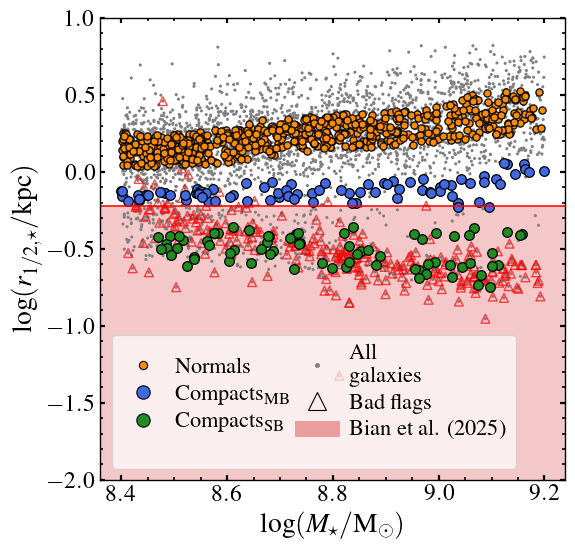

In [3]:
fig=plt.figure(facecolor='white')
plt.rcParams.update({'figure.figsize': (6, 6)})
X = np.transpose(np.array([df_z0_Mstar_Range.logMstarRad_99,df_z0_Mstar_Range.logHalfRadstar_99]))
Masses = np.linspace(8.4, 9.2, 100)



plt.axhspan(-2.2, np.log10(0.6), facecolor='tab:red', alpha=0.25)

plt.scatter(X[:,0],X[:,1],s=5,c='gray',ec='none')

# Main branch

# Normals

plt.scatter(PaperII.logMstarRad_99[PaperII.SubfindID_99.isin(TNG.extractPopulation('BadFlag', SubfindID_99 = True))],
            PaperII.logHalfRadstar_99[PaperII.SubfindID_99.isin(TNG.extractPopulation('BadFlag', SubfindID_99 = True))], marker = '^',
            s=40,c='none', ec = 'red', alpha = 0.7)


plt.scatter(PaperII.logMstarRad_99[PaperII.SubfindID_99.isin(TNG.extractPopulation('NormalSatellite', SubfindID_99 = True))],
            PaperII.logHalfRadstar_99[PaperII.SubfindID_99.isin(TNG.extractPopulation('NormalSatellite', SubfindID_99 = True))],
            s=4.5*6,c='darkorange', linewidths= 0.9)


plt.scatter(PaperII.logMstarRad_99[PaperII.SubfindID_99.isin(TNG.extractPopulation('MBCSatellite', SubfindID_99 = True))],
            PaperII.logHalfRadstar_99[PaperII.SubfindID_99.isin(TNG.extractPopulation('MBCSatellite', SubfindID_99 = True))],
            s=8*6,c='royalblue',  linewidths= .9)


plt.scatter(PaperII.logMstarRad_99[PaperII.SubfindID_99.isin(TNG.extractPopulation('SBCSatellite', SubfindID_99 = True))],
            PaperII.logHalfRadstar_99[PaperII.SubfindID_99.isin(TNG.extractPopulation('SBCSatellite', SubfindID_99 = True))],
            s=8*6,c='forestgreen',  linewidths= .9)

plt.scatter(PaperII.logMstarRad_99[PaperII.SubfindID_99.isin(TNG.extractPopulation('SBCBornYoungSatellite', SubfindID_99 = True))],
            PaperII.logHalfRadstar_99[PaperII.SubfindID_99.isin(TNG.extractPopulation('SBCBornYoungSatellite', SubfindID_99 = True))],
            s=8*6,c='forestgreen',  linewidths= .9)



plt.axhline(np.log10(0.6), color = 'red', ls = '-', lw = 1.1)

columnspacing = 0.2
handletextpad = 0.4
labelspacing = 0.3
fontlegend= 27
framealpha= 0.7
alphaScater=0.8
quantile=0.28

custom_lines, label, ncol, mult = plot.Legend(
    ['NormalBlackLineScatter',  'MBCBlackLineScatter', 'SBCBlackLineScatter', 'None', 'TNGrageScatter','BadFlagBlackLineScatter', 'Bian et al. (2025)'])
plt.legend(
    custom_lines, label, ncol=ncol, fontsize=mult*fontlegend, framealpha=framealpha, 
    columnspacing = columnspacing, handletextpad = handletextpad, labelspacing = labelspacing)

plt.ylim(-2.0, 1.0)
#plt.xlim(0, 10)
plt.tick_params(labelsize = 0.85 * 20)
plt.xlabel(r'$\log(M_\star/\mathrm{M}_\odot)$', fontsize = 20)
plt.ylabel(r'$\log(r_{1/2, \star}/\mathrm{kpc})$', fontsize = 20)


plt.savefig(os.getenv("HOME")+'/TNG_Analyzes/Figs/' + SIMTNG + '/PaperII/PlotScatter/sizevsM_Classes.pdf')

# Fig. 2

Normal: 0.0304109732508513
MBC: 0.0
SBC: 0.0875753453921494
Normal: 0.3265849176490008
MBC: 0.0203916353759355
SBC: 0.3698460629905559
Normal: 0.9894606364575405
MBC: 0.4706830278021542
SBC: 0.996779275979552


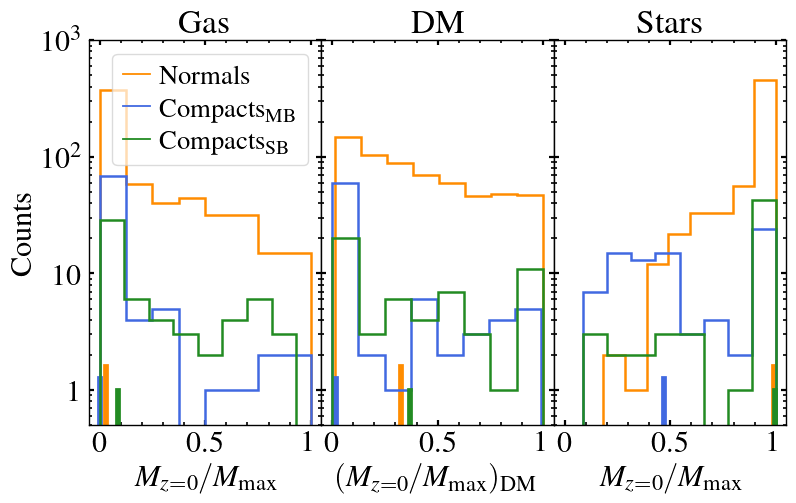

In [4]:
plot.PlotHist(['Normal',  'MBC', 'SBC'], 
              ['Mgas_Norm_Max_99',
             'MDM_Norm_Max_99', 'Mstar_Norm_Max_99'], ['Satellite'],  Type = 'z0',
               savepath='PaperII/PlotHist',  savefigname='Gas', dfName='PaperII', SampleName='SubfindID_99', 
                density=False, 
                ColumnPlot = False, bins=[[8, 8, 8]], median=True,  legend = True, 
                lNum = 5, cNum = 3, GridMake = False,
                LegendNames = [[ 'Normal', 'MBC', 'SBC']], 
                xlimmin = [-0.05, -0.05, -0.05], xlimmax = [1.05, 1.05, 1.05],  
                legpositions = [[0, 0]], title = ['Gas', 'DM', 'Stars'],
                yscale = 'log',loc=['best'],TRANSPARENT = True, LookBackTime = True,
                fontlabel=22,  handlelength = 1,
                framealpha=0.7, handletextpad = 0.35)

# Fig. 3


 Type:  Satellite

 Type:  Satellite


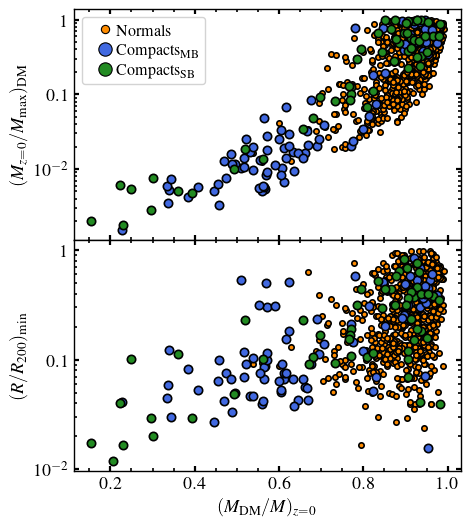

In [5]:
plot.PlotScatter(['Normal','MBC', 'SBC'], ['Satellite'], 'DMFrac_99', ['MDM_Norm_Max_99', 'rOverR200Min'],  Type='z0', snap=[99],
 title=False, medianBins=False, medianAll=False, xlabelintext=False, All=None,
                legend=True, LegendNames=[['NormalBlackLineScatter', 'MBCBlackLineScatter', 'SBCBlackLineScatter']],  TRANSPARENT = False, COLORBAR = None, medianDot = False, 
                alphaScater=1.,   alphaShade=0.3,  linewidth=1.2, 
                fontlabel=13.2,  
                m='o', msizet=4.5, quantile=0.95,framealpha = 0.85, q = 0.95,
                MarkerSizes = None,
                lNum = 3, cNum = 5, GridMake = False,
                #ylimmin = [1.9e-4], ylimmax = [0.99], xlimmin = [6e-3], xlimmax = [25],  
                legpositions = [[0, 0]],  
                columnspacing = 0.5, handletextpad = -0.3, labelspacing = 0.3, loc = ['best'],
                savepath='PaperII/PlotScatter',  savefigname='DMFracMaxTot', dfName='PaperII', SampleName='Samples', cmap = 'inferno',
                bins=10, seed=16010504, mult = 4.1)

# Fig. 4


 Type:  SatelliteDMrich
MBC  X =  0.440298 Y =  0.503048
Normal  X =  0.440298 Y =  0.575981
SBC  X =  0.214425 Y =  0.214425

 Type:  SatelliteDMpoor
MBC  X =  0.81671 Y =  1.201538
Normal  X =  0.5031995 Y =  0.584604
SBC  X =  0.440298 Y =  1.154603


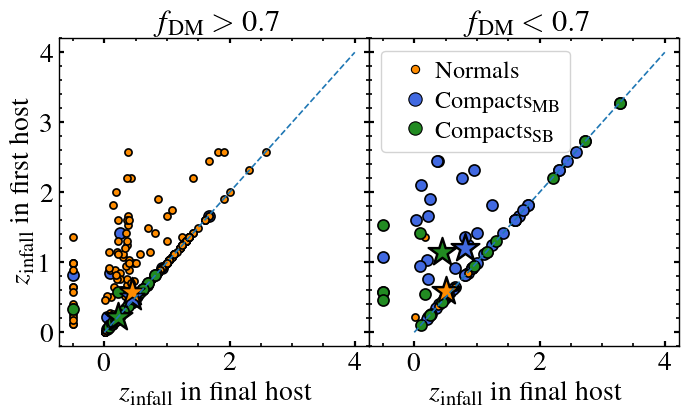

In [6]:
plot.PlotScatter([ 'MBC', 'Normal', 'SBC'], ['SatelliteDMrich', 'SatelliteDMpoor'], 'z_At_FinalEntry', 'z_At_FirstEntry',  Type='z0', snap=[99],
 title=['DMrich','DMpoor'],medianBins=False, medianAll=False, xlabelintext=False, All=None, 
                legend=True, LegendNames=[['NormalBlackLineScatter', 'MBCBlackLineScatter', 'SBCBlackLineScatter']],  TRANSPARENT = True,  medianDot = True, 
                alphaScater=1.,   alphaShade=0.3,  linewidth=1.2, 
                fontlabel=20,  msizeMult = 1.2,
                m='o', msizet=8, quantile=0.95,framealpha = 0.85, q = 0.95,
                MarkerSizes = None,
                lNum = 4, cNum = 4, GridMake = False,
                #ylimmin = [1.9e-4], ylimmax = [0.99], xlimmin = [6e-3], xlimmax = [25],  
                legpositions = [[1, 0]],  
                columnspacing = 0.5, handletextpad = -0.2, labelspacing = 0.3, loc = ['best'], EqualLine = True, EqualLineMin = 0, EqualLineMax = 4,
                savepath='PaperII/PlotScatter',  savefigname='SnapEntry', dfName='PaperII', SampleName='Samples', cmap = 'Reds',
                bins=10, seed=16010504, mult = 6.1)

In [7]:
TNG.compare_Sample_key('z_At_FinalEntry', [['Normal_Satellite_DMpoor', 'MBC_Satellite_DMpoor'],
                               ['SBC_Satellite_DMpoor', 'MBC_Satellite_DMpoor'],
                               ['Normal_Satellite_DMpoor', 'SBC_Satellite_DMpoor']], dfName = 'PaperII')
print('\n')
TNG.compare_Sample_key('z_At_FirstEntry', [['Normal_Satellite_DMpoor', 'MBC_Satellite_DMpoor'],
                               ['SBC_Satellite_DMpoor', 'MBC_Satellite_DMpoor'],
                               ['Normal_Satellite_DMpoor', 'SBC_Satellite_DMpoor']], dfName = 'PaperII')

Normal_Satellite_DMpoor  and  MBC_Satellite_DMpoor
Medians:  0.503 0.834
Observed Test Statistic: 0.33089
Permutation Test P-Value: 0.25626
SBC_Satellite_DMpoor  and  MBC_Satellite_DMpoor
Medians:  1.053 0.834
Observed Test Statistic: 0.21848
Permutation Test P-Value: 0.42754
Normal_Satellite_DMpoor  and  SBC_Satellite_DMpoor
Medians:  0.503 1.053
Observed Test Statistic: 0.54937
Permutation Test P-Value: 0.23608


Normal_Satellite_DMpoor  and  MBC_Satellite_DMpoor
Medians:  0.585 1.202
Observed Test Statistic: 0.61693
Permutation Test P-Value: 0.0851
SBC_Satellite_DMpoor  and  MBC_Satellite_DMpoor
Medians:  1.155 1.202
Observed Test Statistic: 0.04693
Permutation Test P-Value: 0.98988
Normal_Satellite_DMpoor  and  SBC_Satellite_DMpoor
Medians:  0.585 1.155
Observed Test Statistic: 0.57
Permutation Test P-Value: 0.3214


In [8]:
TNG.compare_Sample_key('z_At_FinalEntry', [['Normal_Satellite_DMrich', 'Normal_Satellite_DMpoor'],
                               ['MBC_Satellite_DMrich', 'MBC_Satellite_DMpoor'],
                               ['SBC_Satellite_DMrich', 'SBC_Satellite_DMpoor']], dfName = 'PaperII')
print('\n')
TNG.compare_Sample_key('z_At_FirstEntry', [['Normal_Satellite_DMrich', 'Normal_Satellite_DMpoor'],
                               ['MBC_Satellite_DMrich', 'MBC_Satellite_DMpoor'],
                               ['SBC_Satellite_DMrich', 'SBC_Satellite_DMpoor']], dfName = 'PaperII')


Normal_Satellite_DMrich  and  Normal_Satellite_DMpoor
Medians:  0.461 0.503
Observed Test Statistic: 0.04228
Permutation Test P-Value: 0.80328
MBC_Satellite_DMrich  and  MBC_Satellite_DMpoor
Medians:  0.461 0.834
Observed Test Statistic: 0.37303
Permutation Test P-Value: 0.03074
SBC_Satellite_DMrich  and  SBC_Satellite_DMpoor
Medians:  0.214 1.053
Observed Test Statistic: 0.83814
Permutation Test P-Value: 4e-05


Normal_Satellite_DMrich  and  Normal_Satellite_DMpoor
Medians:  0.576 0.585
Observed Test Statistic: 0.00862
Permutation Test P-Value: 0.97236
MBC_Satellite_DMrich  and  MBC_Satellite_DMpoor
Medians:  0.503 1.202
Observed Test Statistic: 0.69849
Permutation Test P-Value: 0.00692
SBC_Satellite_DMrich  and  SBC_Satellite_DMpoor
Medians:  0.214 1.155
Observed Test Statistic: 0.94018
Permutation Test P-Value: 4e-05


# Fig. 5


 Type:  SatelliteDMrich
NormalColorbar  X =  12.678106709677415 Y =  0.8318242795184916
MBCColorbar  X =  12.325108672633316 Y =  0.8934015055415652
SBCColorbar  X =  11.86998532035134 Y =  0.7165742964760767

 Type:  SatelliteDMpoor
NormalColorbar  X =  12.002092982783463 Y =  0.570578400285507
MBCColorbar  X =  13.00304864543152 Y =  0.42927219531658467
SBCColorbar  X =  12.389592312428416 Y =  0.4075293321703793


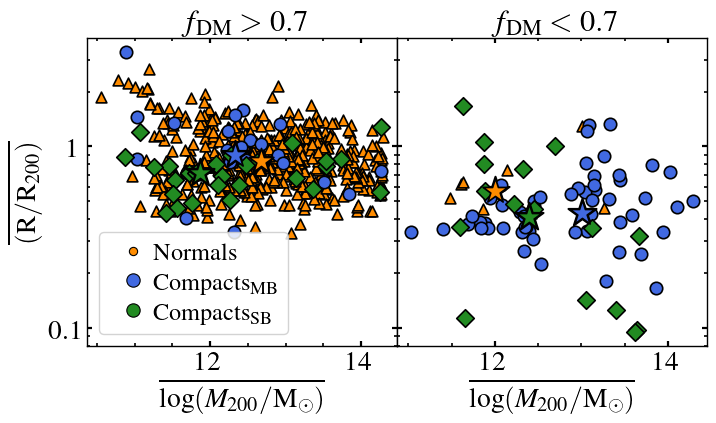

In [9]:
plot.PlotScatter(['NormalColorbar','MBCColorbar', 'SBCColorbar'], ['SatelliteDMrich', 'SatelliteDMpoor'], 'M200Mean', ['rOverR200Mean_New'],  Type='z0', snap=[99],
 title=['DMrich','DMpoor'],medianBins=False, medianAll=False, xlabelintext=False, All=None, # COLORBAR = ['TimeInnerRegion'],
                legend=True, LegendNames=[['NormalBlackLineScatter', 'MBCBlackLineScatter', 'SBCBlackLineScatter']],  TRANSPARENT = True,  medianDot = True, 
                alphaScater=1.,   alphaShade=0.3,  linewidth=1.2, 
                fontlabel=20,  msizeMult = 1.2,
                m='o', msizet=10, quantile=0.95,framealpha = 0.85, q = 0.95,
                MarkerSizes = None,
                lNum = 4, cNum = 4, GridMake = False,
                #ylimmin = [1.9e-4], ylimmax = [0.99], xlimmin = [6e-3], xlimmax = [25],  
                legpositions = [[0, 0]],  
                columnspacing = 0.5, handletextpad = -0.2, labelspacing = 0.3, loc = ['best'], EqualLine = False, EqualLineMin = 0, EqualLineMax = 4,
                savepath='PaperII/PlotScatter',  savefigname='Environment', dfName='PaperII', SampleName='Samples', cmap = 'rainbow',
                bins=10, seed=16010504, mult = 6.1)

In [10]:
TNG.compare_Sample_key('M200Mean', [['Normal_Satellite_DMpoor', 'MBC_Satellite_DMpoor'],
                               ['SBC_Satellite_DMpoor', 'MBC_Satellite_DMpoor'],
                               ['Normal_Satellite_DMpoor', 'SBC_Satellite_DMpoor']], dfName = 'PaperII')
print('\n')
TNG.compare_Sample_key('rOverR200Mean', [['Normal_Satellite_DMpoor', 'MBC_Satellite_DMpoor'],
                               ['SBC_Satellite_DMpoor', 'MBC_Satellite_DMpoor'],
                               ['Normal_Satellite_DMpoor', 'SBC_Satellite_DMpoor']], dfName = 'PaperII')

Normal_Satellite_DMpoor  and  MBC_Satellite_DMpoor
Medians:  12.002 13.003
Observed Test Statistic: 1.00096
Permutation Test P-Value: 0.01584
SBC_Satellite_DMpoor  and  MBC_Satellite_DMpoor
Medians:  12.39 13.003
Observed Test Statistic: 0.61346
Permutation Test P-Value: 0.17314
Normal_Satellite_DMpoor  and  SBC_Satellite_DMpoor
Medians:  12.002 12.39
Observed Test Statistic: 0.3875
Permutation Test P-Value: 0.46024


Normal_Satellite_DMpoor  and  MBC_Satellite_DMpoor
Medians:  0.629 0.414
Observed Test Statistic: 0.21441
Permutation Test P-Value: 0.01146
SBC_Satellite_DMpoor  and  MBC_Satellite_DMpoor
Medians:  0.429 0.414
Observed Test Statistic: 0.01478
Permutation Test P-Value: 0.8592
Normal_Satellite_DMpoor  and  SBC_Satellite_DMpoor
Medians:  0.629 0.429
Observed Test Statistic: 0.19963
Permutation Test P-Value: 0.0736


In [11]:
TNG.compare_Sample_key('M200Mean', [['Normal_Satellite_DMrich', 'Normal_Satellite_DMpoor'],
                               ['MBC_Satellite_DMrich', 'MBC_Satellite_DMpoor'],
                               ['SBC_Satellite_DMrich', 'SBC_Satellite_DMpoor']], dfName = 'PaperII')
print('\n')
TNG.compare_Sample_key('rOverR200Mean', [['Normal_Satellite_DMrich', 'Normal_Satellite_DMpoor'],
                               ['MBC_Satellite_DMrich', 'MBC_Satellite_DMpoor'],
                               ['SBC_Satellite_DMrich', 'SBC_Satellite_DMpoor']], dfName = 'PaperII')


Normal_Satellite_DMrich  and  Normal_Satellite_DMpoor
Medians:  12.678 12.002
Observed Test Statistic: 0.67601
Permutation Test P-Value: 0.07872
MBC_Satellite_DMrich  and  MBC_Satellite_DMpoor
Medians:  12.325 13.003
Observed Test Statistic: 0.67794
Permutation Test P-Value: 0.00982
SBC_Satellite_DMrich  and  SBC_Satellite_DMpoor
Medians:  11.87 12.39
Observed Test Statistic: 0.51961
Permutation Test P-Value: 0.1669


Normal_Satellite_DMrich  and  Normal_Satellite_DMpoor
Medians:  0.768 0.629
Observed Test Statistic: 0.13931
Permutation Test P-Value: 0.24802
MBC_Satellite_DMrich  and  MBC_Satellite_DMpoor
Medians:  0.82 0.414
Observed Test Statistic: 0.40561
Permutation Test P-Value: 0.0
SBC_Satellite_DMrich  and  SBC_Satellite_DMpoor
Medians:  0.731 0.429
Observed Test Statistic: 0.3019
Permutation Test P-Value: 6e-05


# Fig. 6

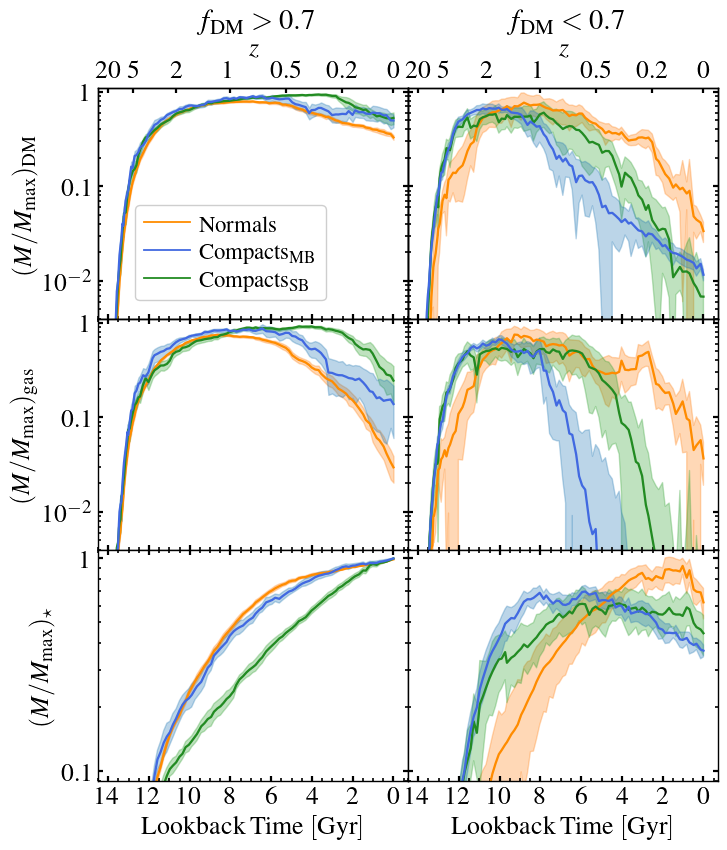

In [12]:
plot.PlotMedianEvolution(['Normal','SBC', 'MBC'], ['SatelliteDMrich', 'SatelliteDMpoor'],  ['MDM_Norm_Max',  'Mgas_Norm_Max', 'Mstar_Norm_Max'], 
                     Type='Evolution', Xparam=['Time'], title=['DMrich', 'DMpoor'], 
                        xlabelintext=False, lineparams=False,  LookBackTime = True, 
                        ColumnPlot=True, limaxis=True,  legend=True,  legendColumn = True, 
                        Transparent = True, Text = None, Pericenter = False, Supertitle = False, GridMake = False,
                        savepath='PaperII/PlotMedianEvolution',  savefigname='DMpoorMass', dfName='PaperII', SampleName='SubfindID_99', 
                        Supertitle_Name = 'DM-rich',LegendNames=[['Normal', 'MBC', 'SBC']],
                        loc = [(0.12, 0.08), 'best', 'best'],  loctext = ['best'],
                        ylimmin = [0.004, 0.004, 0.09,], ylimmax = [1.1,1.1, 1.1], xlimmin = None, xlimmax = None,  
                        legpositions = [[0, 0]], 
                        lNum = 3, cNum = 4,
                        alphaShade=0.3,  linewidth=1.1, framealpha = 0.95,  fontlabel=18.75,   nboots=100,  
                        Supertitle_y = 0.99,  columnspacing = 0.5, handletextpad = 0.4, labelspacing = 0.3, 
                        bins=10, seed=16040105)

# Fig. 7

SatelliteDMrich: -1.3104673828453637
SatelliteDMpoor: 0.2767751039573468
SatelliteDMrich: -0.388616108614443
SatelliteDMpoor: 0.5099250288317605


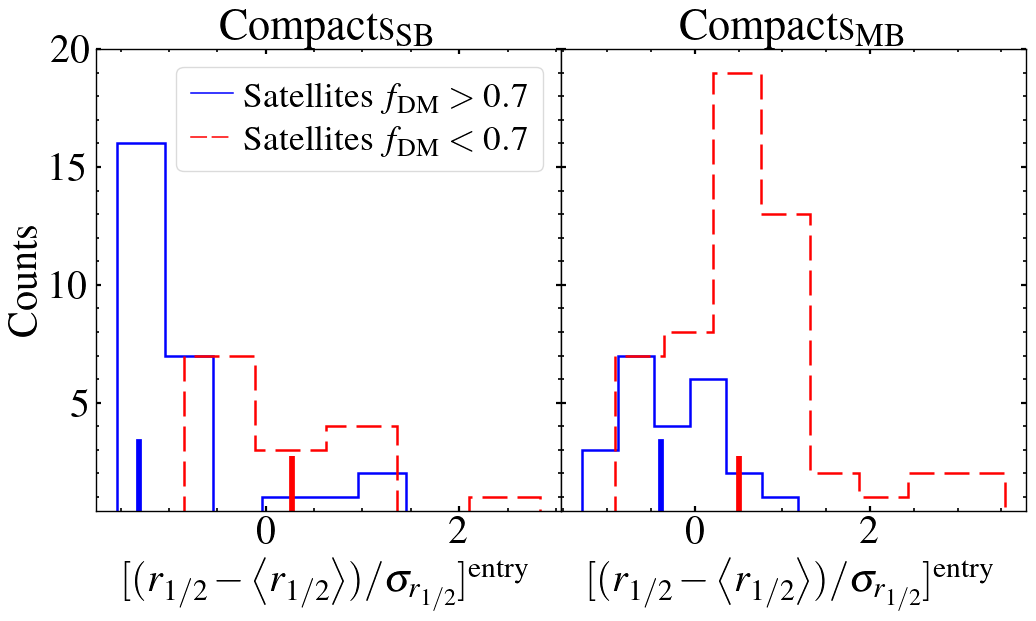

In [13]:
plot.PlotHist(['SatelliteDMrich', 'SatelliteDMpoor'], ['SBC', 'MBC'],
              ['deltaSize_at_Entry'],   Type = 'Sample',
               savepath='PaperII/PlotHist',  savefigname='SizeDelta', dfName='PaperII', SampleName='SubfindID_99', 
                density=False, 
                ColumnPlot = True,  median=True,  legend = True,  legendColumn = True, GridMake = False,
                lNum = 6, cNum = 6, title = ['SBC', 'MBC'], 
                LegendNames = [['SatelliteDMrich', 'SatelliteDMpoor']], legpositions = [[0, 0]], #xlabelintext = ['SBC', 'MBC'], 
                ylimmin = [0.4, 0.4], ylimmax = [20, 32], #xlimmin = [-0.1, 10.2, 0.08], xlimmax = [3.5, 14.9, 9],
                yscale = 'linear', TRANSPARENT = True, LookBackTime = True, loc = ['upper right'],
                fontlabel=29,
                framealpha=0.7, handlelength = 1.2, handletextpad = 0.3)


# Fig. 8

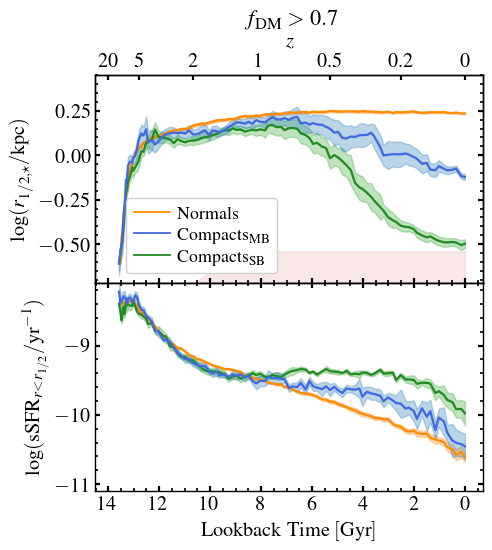

In [14]:
plot.PlotMedianEvolution(['Normal','SBC', 'MBC'], ['SatelliteDMrich'],  ['SubhaloHalfmassRadType4',  'SubhalosSFRInHalfRad'], 
                     Type='Evolution', Xparam=['Time'], title=['DMrich'], 
                        xlabelintext=False, lineparams=False,  LookBackTime = True, 
                        ColumnPlot=True, limaxis=True,  legend=True,  legendColumn = True, 
                        Transparent = True, Text = None, Pericenter = False, Supertitle = False, GridMake = False,
                        savepath='PaperII/PlotMedianEvolution',  savefigname='SizesSFR', dfName='PaperII', SampleName='SubfindID_99', 
                        Supertitle_Name = 'DM-rich',LegendNames=[['Normal', 'MBC', 'SBC']],
                        loc = [(0.08, 0.05), 'best', 'best'],  loctext = ['best'],
                        ylimmin = [-0.72, -11.1], ylimmax = [0.45, -8.1], xlimmin = None, xlimmax = None,  
                        legpositions = [[0, 0]], 
                        lNum = 2.7, cNum = 5,
                        alphaShade=0.3,  linewidth=1.1, framealpha = 0.95,  fontlabel=14.75,   nboots=100,  
                        Supertitle_y = 0.99, Softening = True, columnspacing = 0.5, handletextpad = 0.4, labelspacing = 0.3, 
                        bins=10, seed=16040105)

# Fig. 9

SatelliteDMrich: -9.373894059190118
SatelliteDMpoor: -10.19202949613696
Central: -9.334814492522217
SatelliteDMrich: -9.543069794774055
SatelliteDMpoor: -11.145625110067265
Central: -9.40184503502962


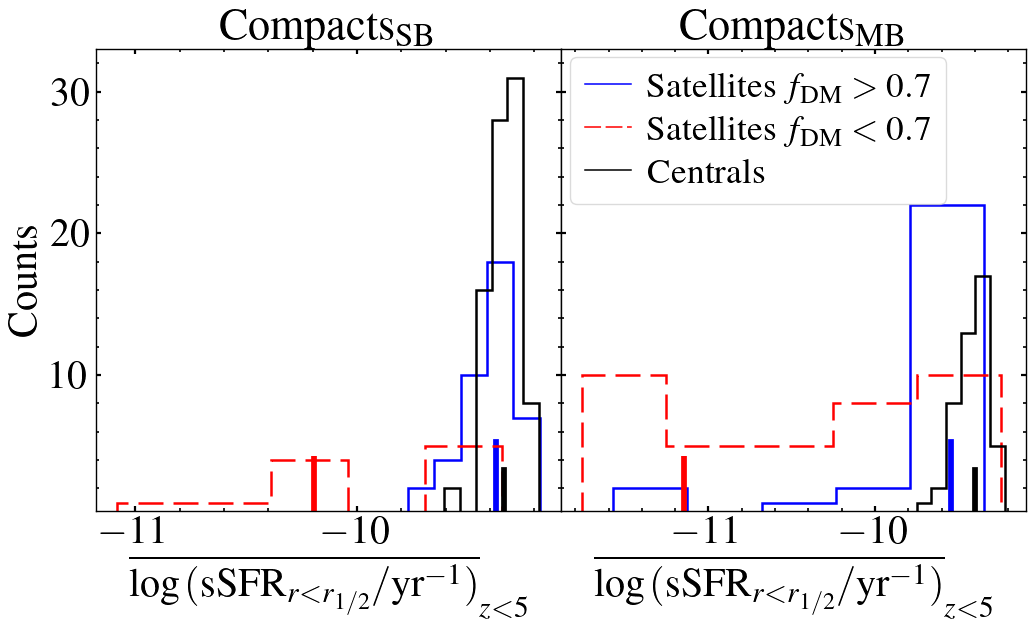

In [15]:
plot.PlotHist(['SatelliteDMrich', 'SatelliteDMpoor', 'Central'], ['SBC', 'MBC'],
              ['sSFRinHalfRadAfterz5'],   Type = 'Sample',
               savepath='PaperII/PlotHist',  savefigname='sSFRCentrals', dfName='PaperII', SampleName='SubfindID_99', 
                density=False, 
                ColumnPlot = True, bins=[[5, 5, 6]], median=True,  legend = True,  legendColumn = True, GridMake = False,
                lNum = 6, cNum = 6, title = ['SBC', 'MBC'], 
                LegendNames = [['SatelliteDMrich', 'SatelliteDMpoor', 'Central']], legpositions = [[1, 0]], loc = [(0.02, 0.665)],
                ylimmin = [0.4, 0.4], ylimmax = [33, 32], #xlimmin = [-0.1, 10.2, 0.08], xlimmax = [3.5, 14.9, 9],
                yscale = 'linear', TRANSPARENT = True, LookBackTime = True, 
                fontlabel=29, handlelength = 1.3,
                framealpha=0.7, handletextpad = 0.45)

In [16]:
TNG.compare_Sample_key('sSFRinHalfRadAfterz5', [['MBC_Satellite_DMrich', 'MBC_Central'],
                               ['SBC_Satellite_DMrich', 'SBC_Central'],
                               ['MBC_Satellite_DMpoor', 'MBC_Central'],
                               ['SBC_Satellite_DMpoor', 'SBC_Centralr']], dfName = 'PaperII')


MBC_Satellite_DMrich  and  MBC_Central
Medians:  -9.543 -9.402
Observed Test Statistic: 0.14122
Permutation Test P-Value: 0.0001
SBC_Satellite_DMrich  and  SBC_Central
Medians:  -9.374 -9.335
Observed Test Statistic: 0.03908
Permutation Test P-Value: 0.018
MBC_Satellite_DMpoor  and  MBC_Central
Medians:  -11.146 -9.402
Observed Test Statistic: 1.74378
Permutation Test P-Value: 0.0
SBC_Satellite_DMpoor  and  SBC_Centralr
Medians:  -10.192 -9.335
Observed Test Statistic: 0.85722
Permutation Test P-Value: 0.0


# Fig. 10

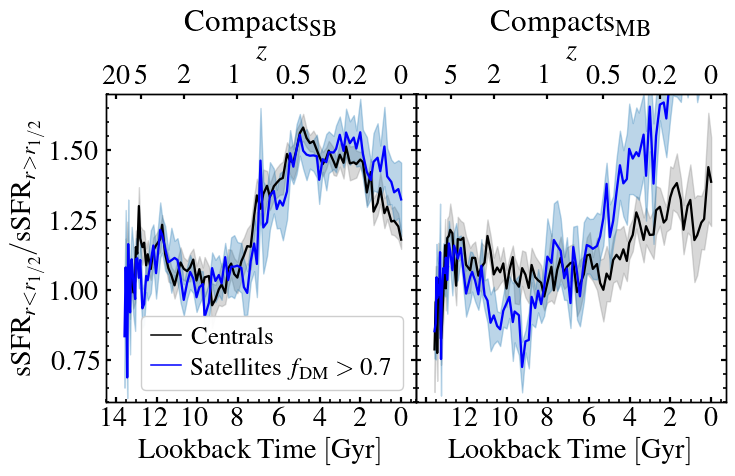

In [17]:
plot.PlotMedianEvolution(['Central', 'SatelliteDMrich'], ['SBC', 'MBC'],  ['sSFRCoreRatio'], 
                     Type='Evolution', Xparam=['Time'], title=['SBC', 'MBC'], 
                        xlabelintext=False, lineparams=False,  LookBackTime = True, 
                        ColumnPlot=True, limaxis=True,  legend=True,  legendColumn = True, 
                        Transparent = True, Text = None, Pericenter = False, Supertitle = False, GridMake = False,
                        savepath='PaperII/PlotMedianEvolution',  savefigname='sSFRRatioCentrals', dfName='PaperII', SampleName='SubfindID_99', 
                        Supertitle_Name = 'DM-rich',LegendNames=[['Central', 'SatelliteDMrich']],
                        loc = ['best'],  loctext = ['best'],
                        ylimmin = [0.6], ylimmax = [1.7], xlimmin = None, xlimmax = None,
                        legpositions = [[0, 0]],
                        lNum = 4, cNum = 4, SmallerScale= True,
                        alphaShade=0.3,  linewidth=1.1, framealpha = 0.95,  fontlabel=20.5,   nboots=100,  
                        Supertitle_y = 0.99,  columnspacing = 0.5, handletextpad = 0.4, labelspacing = 0.3,  handlelength = 1.2, 
                        bins=10, seed=16040105)


# Fig. 11

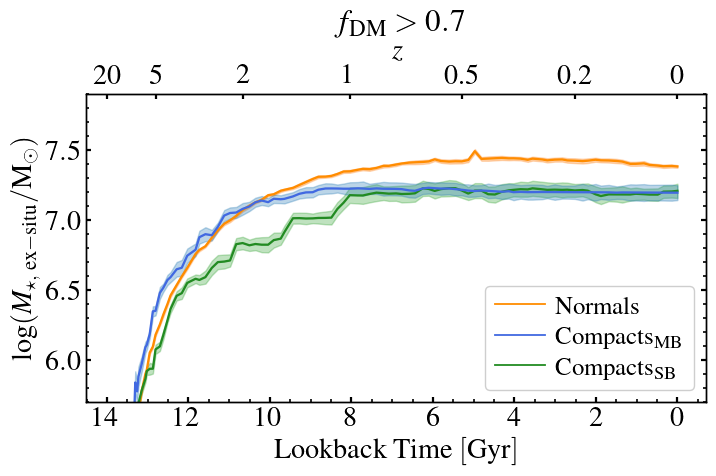

In [18]:
plot.PlotMedianEvolution(['Normal','SBC', 'MBC'], ['SatelliteDMrich'],  ['StellarMassExSitu'], 
                     Type='Evolution', Xparam=['Time'], title=['DMrich', 'DMpoor'], 
                        xlabelintext=False, lineparams=False,  LookBackTime = True, 
                        ColumnPlot=True, limaxis=True,  legend=True,  legendColumn = True, 
                        Transparent = True, Text = None, Pericenter = False, Supertitle = False,  GridMake = False,
                        savepath='PaperII/PlotMedianEvolution',  savefigname='ExSitu', dfName='PaperII', SampleName='SubfindID_99', 
                        Supertitle_Name = 'DM-rich',LegendNames=[['Normal', 'MBC', 'SBC']],
                        loc = ['best'],  loctext = ['best'],
                        ylimmin = [5.7], ylimmax = [7.9],
                        legpositions = [[0, 0]], SmallerScale = True, EntryMedian = False,
                        lNum = 4, cNum = 8,
                        alphaShade=0.3,  linewidth=1.1, framealpha = 0.95,  fontlabel=20.5,   nboots=100,  
                        Supertitle_y = 0.99,  columnspacing = 0.5, handletextpad = 0.4, labelspacing = 0.3, 
                        bins=10, seed=16040105)

# Fig. 12

In [ ]:
IDs_SBCSatelliteDMrich = np.array([   91,    156,    165,  63918,  96799, 167427, 198195, 198199,
       264900, 319740, 324134, 355736, 379807, 439101, 440412, 468596,
       489208, 499708, 513846, 531321, 570842, 573063, 574616, 592022,
       616015, 618581, 625186, 629892, 649988, 661261, 667085, 668241,
       671097, 684712, 692883, 694489, 697154, 724892, 725997, 770775,
       804308])

IDs_SBCSatelliteDMpoor = np.array([63990,  64002,  96853, 117357, 229992, 229996, 294887, 294895,
                                   358627, 422770, 428191, 500583, 516761, 602132, 602133, 603556])

IDs_MBCSatelliteDMrich = np.array([550,  63973,  96789, 117311, 220616, 229958, 264932, 289394,
       300918, 307497, 307502, 342468, 372756, 419621, 422762, 435755,
       445628, 450924, 487746, 488533, 489207, 571909, 579511, 590015,
       597142, 681818, 701373, 814011, 823293])

IDs_MBCSatelliteDMpoor = np.array([232,    261,    281,    300,    319,    333,  63993,  64081,
        64129,  96941, 117464, 144008, 144098, 167499, 185005, 185058,
       208883, 220626, 242863, 253897, 253905, 253965, 264911, 264972,
       275601, 282802, 282807, 289444, 307510, 319738, 319743, 377662,
       386293, 394628, 404834, 421566, 421567, 422763, 425726, 432119,
       457435, 467420, 482157, 502998, 530853, 536657, 545439, 549748,
       549750, 558069, 571075, 571910, 588180, 647769])

IDs_NormalSatelliteDMrich = np.array([333431, 677786, 143950,    203,    147, 775527, 198247, 117291,
       427216, 198231, 770462, 117299, 386274, 471252, 800643,  63957,
       594247, 465257, 253882, 763684, 574885, 837220, 143967, 184962,
          423, 508541, 472552,    214, 749432, 184980,  63939, 184966,
       435760, 414921,    181, 345881, 229952, 282799, 264901, 117426,
       184984, 117314,  64009, 184982, 294884, 229984, 208826, 494014,
       433290, 198237])

IDs_NormalSatelliteDMpoor = np.array([184957, 220633, 338455, 436937, 560083, 586424, 602131, 603005])

#%%
fontlabel = 22
nboot = 5000
nbins = 30
plt.rcParams.update({'figure.figsize': (4*3, 4*3)})
fig = plt.figure()
gs = fig.add_gridspec(3, 3, hspace=0, wspace=0)
axs = gs.subplots(sharex='col', sharey='row')
Names = [r'Normals', r'Compacts$_\mathrm{MB}$', r'Compacts$_\mathrm{SB}$']
rmin = 0.06
rmax = 35
for j, PartType in enumerate(['PartType0', 'PartType0', 'PartType4']):
    if j == 0:
        velPlot = True
    else:
        velPlot = False
    for linplot, IDs in enumerate([IDs_NormalSatelliteDMrich, IDs_MBCSatelliteDMrich, IDs_SBCSatelliteDMrich]):
        
        dFHalfStar = TNG.extractDF('SubhaloHalfmassRadType4')
        dFHalfGasRad = TNG.extractDF('SubhaloHalfmassRadType0')
        
        
        #SNAP FIRST
        SnapsFirst = []
        for l, ID in enumerate(IDs):
            if ID == 603556 or ID == 602133:
                continue
            snapFirstEntry = PaperII.Snap_At_FirstEntry.loc[PaperII.SubfindID_99 == ID].values[0]
            if np.isnan(snapFirstEntry) or snapFirstEntry < 0:
                snapFirstEntry = 67
            snap = dfTime.loc[abs(dfTime.Age - dfTime.loc[dfTime.Snap == snapFirstEntry, 'Age'].values[0]) < 1.5, 'Snap'].values[-1]
            if snap < 17:
                snap = 17
            SnapsFirst.append(int(snap))
             
        xFirst, yFirst, yerrFirst, massFirst, xIDsFirst, yIDFirst, massIDsFirst, notIndex = plot.MakeMedianAndIDs(SnapsFirst, IDs, rmin, rmax, nbins, PaperII, PartType = PartType, velPlot= velPlot)
      
        #First
        colors = plt.cm.Blues(np.linspace(0,1,len(yIDFirst)))
        plot.MakeLines(j, axs[j][linplot], yIDFirst, xIDsFirst, IDs, notIndex, colors)
          
        #SNAP FIRST
        Snaps = []
        for l, ID in enumerate(IDs):
            if ID == 603556 or ID == 602133:
                continue
            snapFirstEntry = PaperII.Snap_At_FirstEntry.loc[PaperII.SubfindID_99 == ID].values[0]
            if np.isnan(snapFirstEntry) or snapFirstEntry < 0:
                snapFirstEntry = 67
            Snaps.append(int(snapFirstEntry))
             
        xSecond, ySecond, yerrSecond, massSecond, xIDsSecond, yIDSecond, massIDsSecond, notIndex = plot.MakeMedianAndIDs(Snaps, IDs, rmin, rmax, nbins, PaperII, PartType = PartType, velPlot= velPlot)
      
        #Second
        colors = plt.cm.Greens(np.linspace(0,1,len(yIDSecond)))
        plot.MakeLines(j, axs[j][linplot], yIDSecond, xIDsSecond, IDs, notIndex, colors)
          
        #SNAP Final
        SnapsFinal = []
        for l, ID in enumerate(IDs):
            if ID == 603556 or ID == 602133:
                continue
            snapFirstEntry = PaperII.Snap_At_FirstEntry.loc[PaperII.SubfindID_99 == ID].values[0]
            if np.isnan(snapFirstEntry) or snapFirstEntry < 0:
                snapFirstEntry = 67
            if linplot == 1:
                snap = dfTime.loc[abs(dfTime.Age - dfTime.loc[dfTime.Snap == snapFirstEntry, 'Age'].values[0]) < 2, 'Snap'].values[0]
            else:
                snap = 99 #
            SnapsFinal.append(int(snap))
             
        xFinal, yFinal, yerrFinal, massFinal, xIDsFinal, yIDsFinal, massIDsFinal, notIndex = plot.MakeMedianAndIDs(SnapsFinal, IDs, rmin, rmax, nbins, PaperII, PartType = PartType, velPlot= velPlot)
        
        colors = plt.cm.Reds(np.linspace(0,1,len(yIDsFinal)))
        plot.MakeLines(j, axs[j][linplot], yIDsFinal, xIDsFinal, IDs, notIndex, colors)

    
        if j == 1 or j == 2:
            
            axs[j][linplot].fill_between(xFirst, (yFirst - yerrFirst)*xFirst**2, (yFirst + yerrFirst)*xFirst**2, 
                                        color='tab:red',  alpha=0.3) 
            axs[j][linplot].fill_between(xSecond, (ySecond - yerrSecond)*xSecond**2, (ySecond + yerrSecond)*xSecond**2, 
                                        color='tab:green',  alpha=0.3) 
            axs[j][linplot].fill_between(xFinal, (yFinal - yerrFinal)*xFinal**2, (yFinal + yerrFinal)*xFinal**2, 
                                        color='tab:blue',  alpha=0.3) 
            
            axs[j][linplot].plot(xFirst , yFirst*xFirst**2, color = 'red', lw = 1.5, label = r'$t_\mathrm{entry} - 2 \, \mathrm{[Gyr]}$')
   
            axs[j][linplot].plot(xSecond , ySecond*xSecond**2, color = 'green', lw = 1.5, label = r'$t_\mathrm{entry}$')
            
            axs[j][linplot].plot(xFinal , yFinal*xFinal**2, color = 'blue', lw = 1.5, label = r'$t_\mathrm{entry} + 2 \, \mathrm{[Gyr]}$')
          
        else:
            axs[j][linplot].fill_between(xFirst, (yFirst - yerrFirst), (yFirst + yerrFirst), 
                                        color='tab:red',  alpha=0.3) 
            axs[j][linplot].fill_between(xSecond, (ySecond - yerrSecond), (ySecond + yerrSecond), 
                                        color='tab:green',  alpha=0.3) 
            axs[j][linplot].fill_between(xFinal, (yFinal - yerrFinal), (yFinal + yerrFinal), 
                                        color='tab:blue',  alpha=0.3) 
            
            
            axs[j][linplot].plot(xFirst , yFirst, color = 'red', lw = 1.5, label = r'$t_\mathrm{entry} - 2 \, \mathrm{[Gyr]}$')
            axs[j][linplot].plot(xSecond , ySecond, color = 'green', lw = 1.5, label = r'$t_\mathrm{entry}$')
            axs[j][linplot].plot(xFinal , yFinal, color = 'blue', lw = 1.5, label = r'$t_\mathrm{entry} + 2 \, \mathrm{[Gyr]}$')
          
        
        if j == 0:
            axs[j][linplot].set_title(Names[linplot], fontsize=1.1*fontlabel)
        
        if j != 0 :
            axs[j][linplot].set_yscale('log')

        axs[j][linplot].set_xscale('log')
        
        axs[j][linplot].set_xlim(0.2, 75)

        if j == 0:
            axs[j][linplot].set_ylim(-100, 10)
        elif j == 1:
            axs[j][linplot].set_ylim(5e5, 5e7)

        else:
            axs[j][linplot].set_ylim(5e5, 2e8)
        
        if j == 2:
            axs[j][linplot].tick_params(axis='x', labelsize=0.99*fontlabel)
    
        #axs[0][linplot].axhline(np.nansum(massEntry[massEntry > 0]) / 2., ls = '--', color = 'black')
    
    
        if linplot == 0:
            axs[j][linplot].tick_params(axis='y', labelsize=0.99*fontlabel)
            if j == 2:
                axs[j][linplot].set_ylabel(r'$\rho_{\star} (r) r^2  \; \, \, [\mathrm{M_\odot  \; kpc^{-1}}]$', fontsize=fontlabel)
            elif j == 1:
                axs[j][linplot].set_ylabel(r'$\rho_{\mathrm{gas}} (r) r^2  \; \, \, [\mathrm{M_\odot  \; kpc^{-1}}]$', fontsize=fontlabel)
            else:
                axs[j][linplot].set_ylabel( r'$v_\mathrm{r, \; gas} (r) \, \, [\mathrm{km \, s}^{-1}]$', fontsize=fontlabel)

        if j == 2:
            axs[j][linplot].set_xlabel(r'$r  \; [\mathrm{kpc}]$', fontsize=fontlabel)
        
        
        if j != 0:
            axs[j][linplot].yaxis.set_major_formatter(
                plot.FuncFormatter(plot.format_func_loglog))
        axs[j][linplot].xaxis.set_major_formatter(
            plot.FuncFormatter(plot.format_func_loglog))
        axs[0][0].legend(fontsize=0.9*fontlabel, framealpha = 0.4)

plt.savefig(os.getenv("HOME")+'/TNG_Analyzes/Figs/ProfilesTest.pdf', bbox_inches='tight')    
#plt.ylim(- 0.99, 0.99)


Doesn't have  PartType0  at snap:  89
Doesn't have  PartType0  at snap:  99
Doesn't have  PartType0  at snap:  99
Doesn't have  PartType0  at snap:  99
Doesn't have  PartType0  at snap:  99


# Fig. 13


 Type:  SatelliteDMpoorLoseTheirGas


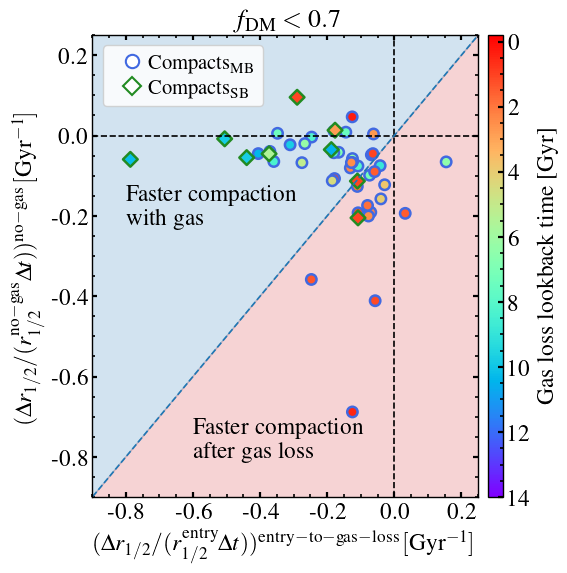

In [3]:
plot.PlotScatter(['MBC', 'SBC'], ['SatelliteDMpoorLoseTheirGas'], 'Decrease_Entry_To_NoGas_Norm_Delta', 'Decrease_NoGas_To_Final_Norm_Delta',  Type='z0', snap=[99],
 title=['DMpoor'], medianBins=False, medianAll=False, xlabelintext=False, All=None, GridMake = False,
                legend=True, LegendNames=[['MBCColorbarEmptyScatter', 'SBCColorbarEmptyScatter']],  TRANSPARENT = False,  
                COLORBAR = ['SnapLostGas'], 
                cmap = 'rainbow',
                medianDot = False, 
                alphaScater=1.,  linewidth=1.2, 
                fontlabel=17,
                m='o', msizet=7, quantile=0.95,framealpha = 0.85, q = 0.95,
                MarkerSizes = None,
                lNum = 6, cNum = 6, EqualLine = True, EqualLineMin = -1., EqualLineMax = 0.3
                ,
                ylimmin = [-0.9], ylimmax = [0.25], xlimmin = [-0.9], xlimmax = [0.25],  
                legpositions = [[0, 0]],
                columnspacing = 0.5, handletextpad = -0.2, labelspacing = 0.3, loc = ['best'],
                savepath='PaperII/PlotScatter',  savefigname='DeltaR_Orb', dfName='PaperII', SampleName='Samples',
                bins=10, seed=16010504, mult = 4.1)

# Fig. 14

# Fig. 15


 Type:  SatelliteDMpoor


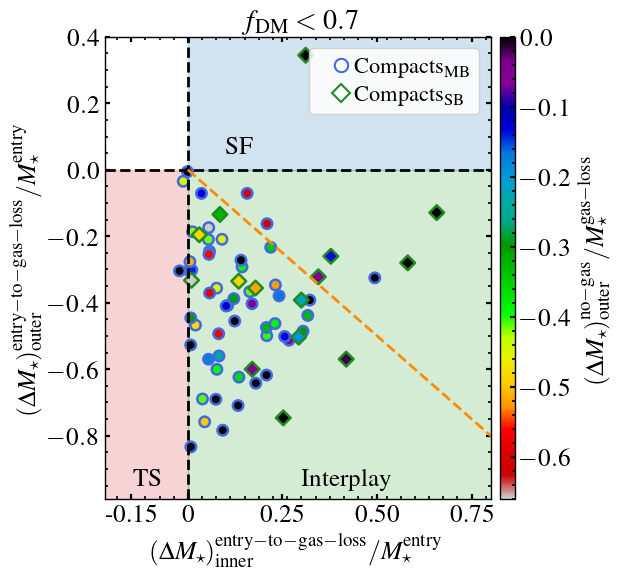

In [4]:
plot.PlotScatter(['MBC', 'SBC'], ['SatelliteDMpoor'], 'MassIn_Infall_to_GasLost', 'MassAboveAfter_Infall_to_GasLost',  Type='z0', snap=[99],
 title=['DMpoor'], medianBins=False, medianAll=False, xlabelintext=False, All=None, GridMake = False,
                legend=True, LegendNames=[['MBCColorbarEmptyScatter', 'SBCColorbarEmptyScatter']],  TRANSPARENT = False,  COLORBAR = ['MassAboveAfterInfall_Lost'], 
                cmap = 'nipy_spectral_r',
                medianDot = False, 
                alphaScater=1.,    linewidth=1.2, 
                fontlabel=18.5,
                m='o', msizet=4.5, quantile=0.95,framealpha = 0.85, q = 0.95,
                MarkerSizes = None,
                lNum = 6, cNum = 6,
                ylimmin = [-0.99], ylimmax = [0.4], xlimmin = [-0.22], xlimmax = [0.8],  
                legpositions = [[0, 0]],
                columnspacing = 0.5, handletextpad = -0.4, labelspacing = 0.3, loc = ['best'],
                savepath='PaperII/PlotScatter',  savefigname='MassIn_Out', dfName='PaperII', SampleName='Samples',
                bins=10, seed=16010504, mult = 4.1)

# Fig. 16

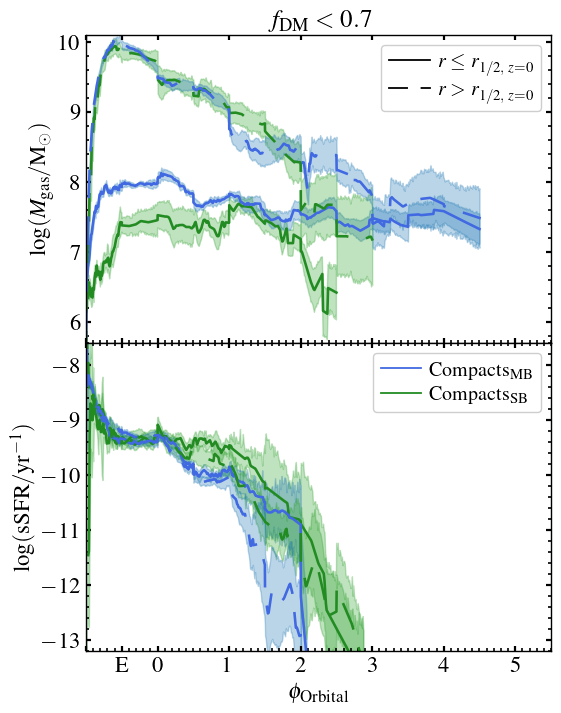

In [5]:
plot.PlotMedianEvolution(['SBC', 'MBC'], ['SatelliteDMpoor'],  [['GasMass_In_TrueRhpkpc', 'GasMass_Above_TrueRhpkpc'], ['sSFR_In_TrueRhpkpc', 'sSFR_Above_TrueRhpkpc']], 
                     Type='Evolution', Xparam=['Time'], title=['DMpoor'], PhasingPlot = True, xPhaseLim = 5,
                        xlabelintext=False, lineparams=True,  LookBackTime = True, 
                        ColumnPlot=True, limaxis=True,  legend=True,  legendColumn = True, 
                        Transparent = True, Text = None, Pericenter = False, Supertitle = False, GridMake = False,
                        savepath='PaperII/PlotMedianEvolution',  savefigname='GasInnerOuterTrue', dfName='PaperII', SampleName='SubfindID_99', 
                        Supertitle_Name = 'DM-rich',LegendNames=[ ['GasMass_In_TrueRhpkpc', 'GasMass_Above_TrueRhpkpc'], [ 'MBC', 'SBC']],
                        loc = ['best', 'best' ],  loctext = ['best', 'best'],
                        legpositions = [[0, 0], [0,1]],
                        lNum = 4, cNum = 6,
                        ylimmin = [5.7, -13.2], ylimmax = [10.1, -7.6],
                        alphaShade=0.3,  linewidth=1.1, framealpha = 0.95,    fontlabel=16.5,   nboots=100,  
                        Supertitle_y = 0.99,  columnspacing = 0.5, handletextpad = 0.4, labelspacing = 0.3, 
                        bins=10, seed=16040105)

# Fig. 17


 Type:  SatelliteDMpoor


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not array(['0.9680366921993744', '0.7785582914964602', '0.7047953623881307',
       '0.3765906734984656', '0.9025613818157728', '0.4530121079872669',
       '0.9924314076250008', '0.5006464522379503', '0.4692083561880625',
       '0.8809215396277277', '0.3261882178927904', '0.9475040972600524',
       '0.7035521471472383', 'DontLoseTheirGas', '0.967463301413269',
       '0.8081710913889558', '0.5103095888107296', '0.9974099827888842',
       '0.8654928810141713', '0.8492976134699033', '0.8132327557740539',
       '0.5206964698358265', '0.7337908146296405', '0.2720265966801218',
       '0.5366438719677008', '0.6503403481855966', '0.8783929743763107',
       'DontLoseTheirGas', nan, '0.5231242233483109',
       '0.7357557662664075', '0.9923415734974942', '0.9416031294256036',
       '0.4780670003099178', '0.4256511357766103', '0.9076614470405818',
       '0.8098922412687996', '0.802480333664871', '0.3094921592482165',
       '1.0', 'DontLoseTheirGas', '0.9699655208104137'], dtype=object)

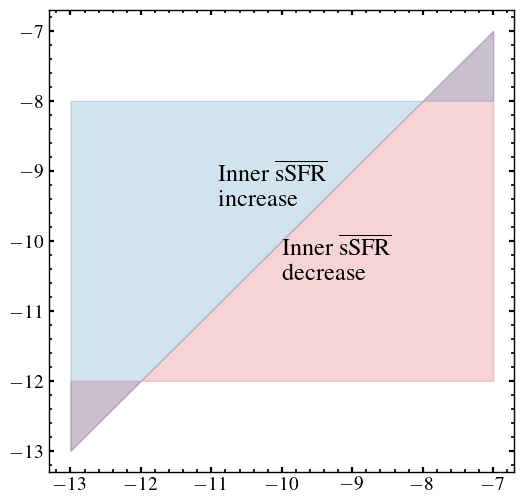

In [6]:
plot.PlotScatter(['MBCLoseTheirGas', 'SBCLoseTheirGas', 'SBCDontLoseTheirGas', 'MBCDontLoseTheirGas'], ['SatelliteDMpoor'], 'sSFRTrueInner_BeforeEntry', ['sSFRTrueInner_Entry_to_Nogas'],  Type='z0', snap=[99],
title=['DMpoor'], medianBins=False, medianAll=False, xlabelintext=False, All=None, GridMake = False, COLORBAR = ['sSFRRatioPericenter'],
               legend=True,LegendNames=[[ 'MBCEmptyScatter', 'SBCEmptyScatter', 'DontLoseTheirGasColorbarScatter', 'LoseTheirGasColorbarScatter',]], TRANSPARENT = False,  
               cmap = 'bwr_r',
               alphaScater=1.,   alphaShade=0.3,  linewidth=1.2, 
               fontlabel=17.7,
               m='o', msizet=4.5, quantile=0.95,framealpha = 0.85, q = 0.95,
               MarkerSizes = None,
               lNum = 6, cNum = 6,
               legpositions = [[0, 0]], 
               ylimmin = [-11.1], ylimmax = [-8.8],xlimmin = [-11.2], xlimmax = [-8.1],
               columnspacing = 0.001, handletextpad = -0.4, labelspacing = 0.3, loc = [(0.01, 0.01)],
               savepath='PaperII/PlotScatter',  savefigname='sSFR_Check', dfName='PaperII', SampleName='Samples',
               bins=10, seed=16010504, mult = 4.1)

# Fig. 18


 Type:  SatelliteDMpoor


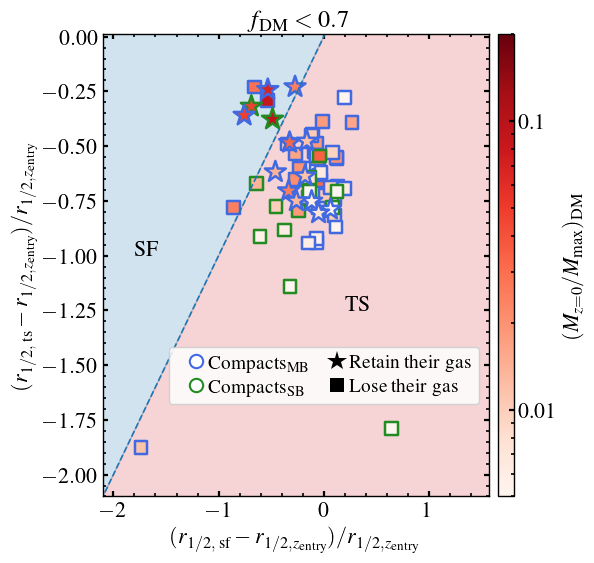

In [7]:
plot.PlotScatter(['MBCLoseTheirGas', 'SBCLoseTheirGas', 'SBCDontLoseTheirGas', 'MBCDontLoseTheirGas'], ['SatelliteDMpoor'], 'Relative_Rhalf_MaxProfile_Minus_HalfRadstar_Entry', 
                 ['Relative_Rhalf_MinProfile_Minus_HalfRadstar_Entry'],  Type='z0', snap=[99], COLORBAR = ['MDM_Norm_Max_99'],
title=['DMpoor'], medianBins=False, medianAll=False, xlabelintext=False, All=None, GridMake = False, 
               legend=True,LegendNames=[[ 'MBCEmptyScatter', 'SBCEmptyScatter', 'DontLoseTheirGasColorbarScatter', 'LoseTheirGasColorbarScatter',]], TRANSPARENT = False,  
               cmap = 'Reds',
               alphaScater=1.,   alphaShade=0.3,  linewidth=1.2, 
               fontlabel=16,
               m='o', msizet=4.5, quantile=0.95,framealpha = 0.85, q = 0.95,
               ylimmin = [-2.1], ylimmax = [0.01],xlimmin = [-2.1], xlimmax = [1.57],
               MarkerSizes = None,
               lNum = 6, cNum = 6,
               legpositions = [[0, 0]],
               columnspacing = 0.5, handletextpad = -0.4, labelspacing = 0.3, loc = [(0.17, 0.2)],
               savepath='PaperII/PlotScatter',  savefigname='Test', dfName='PaperII', SampleName='Samples',
               bins=10, seed=16010504, mult = 4.1)

# Fig. 19

# Fig. 20

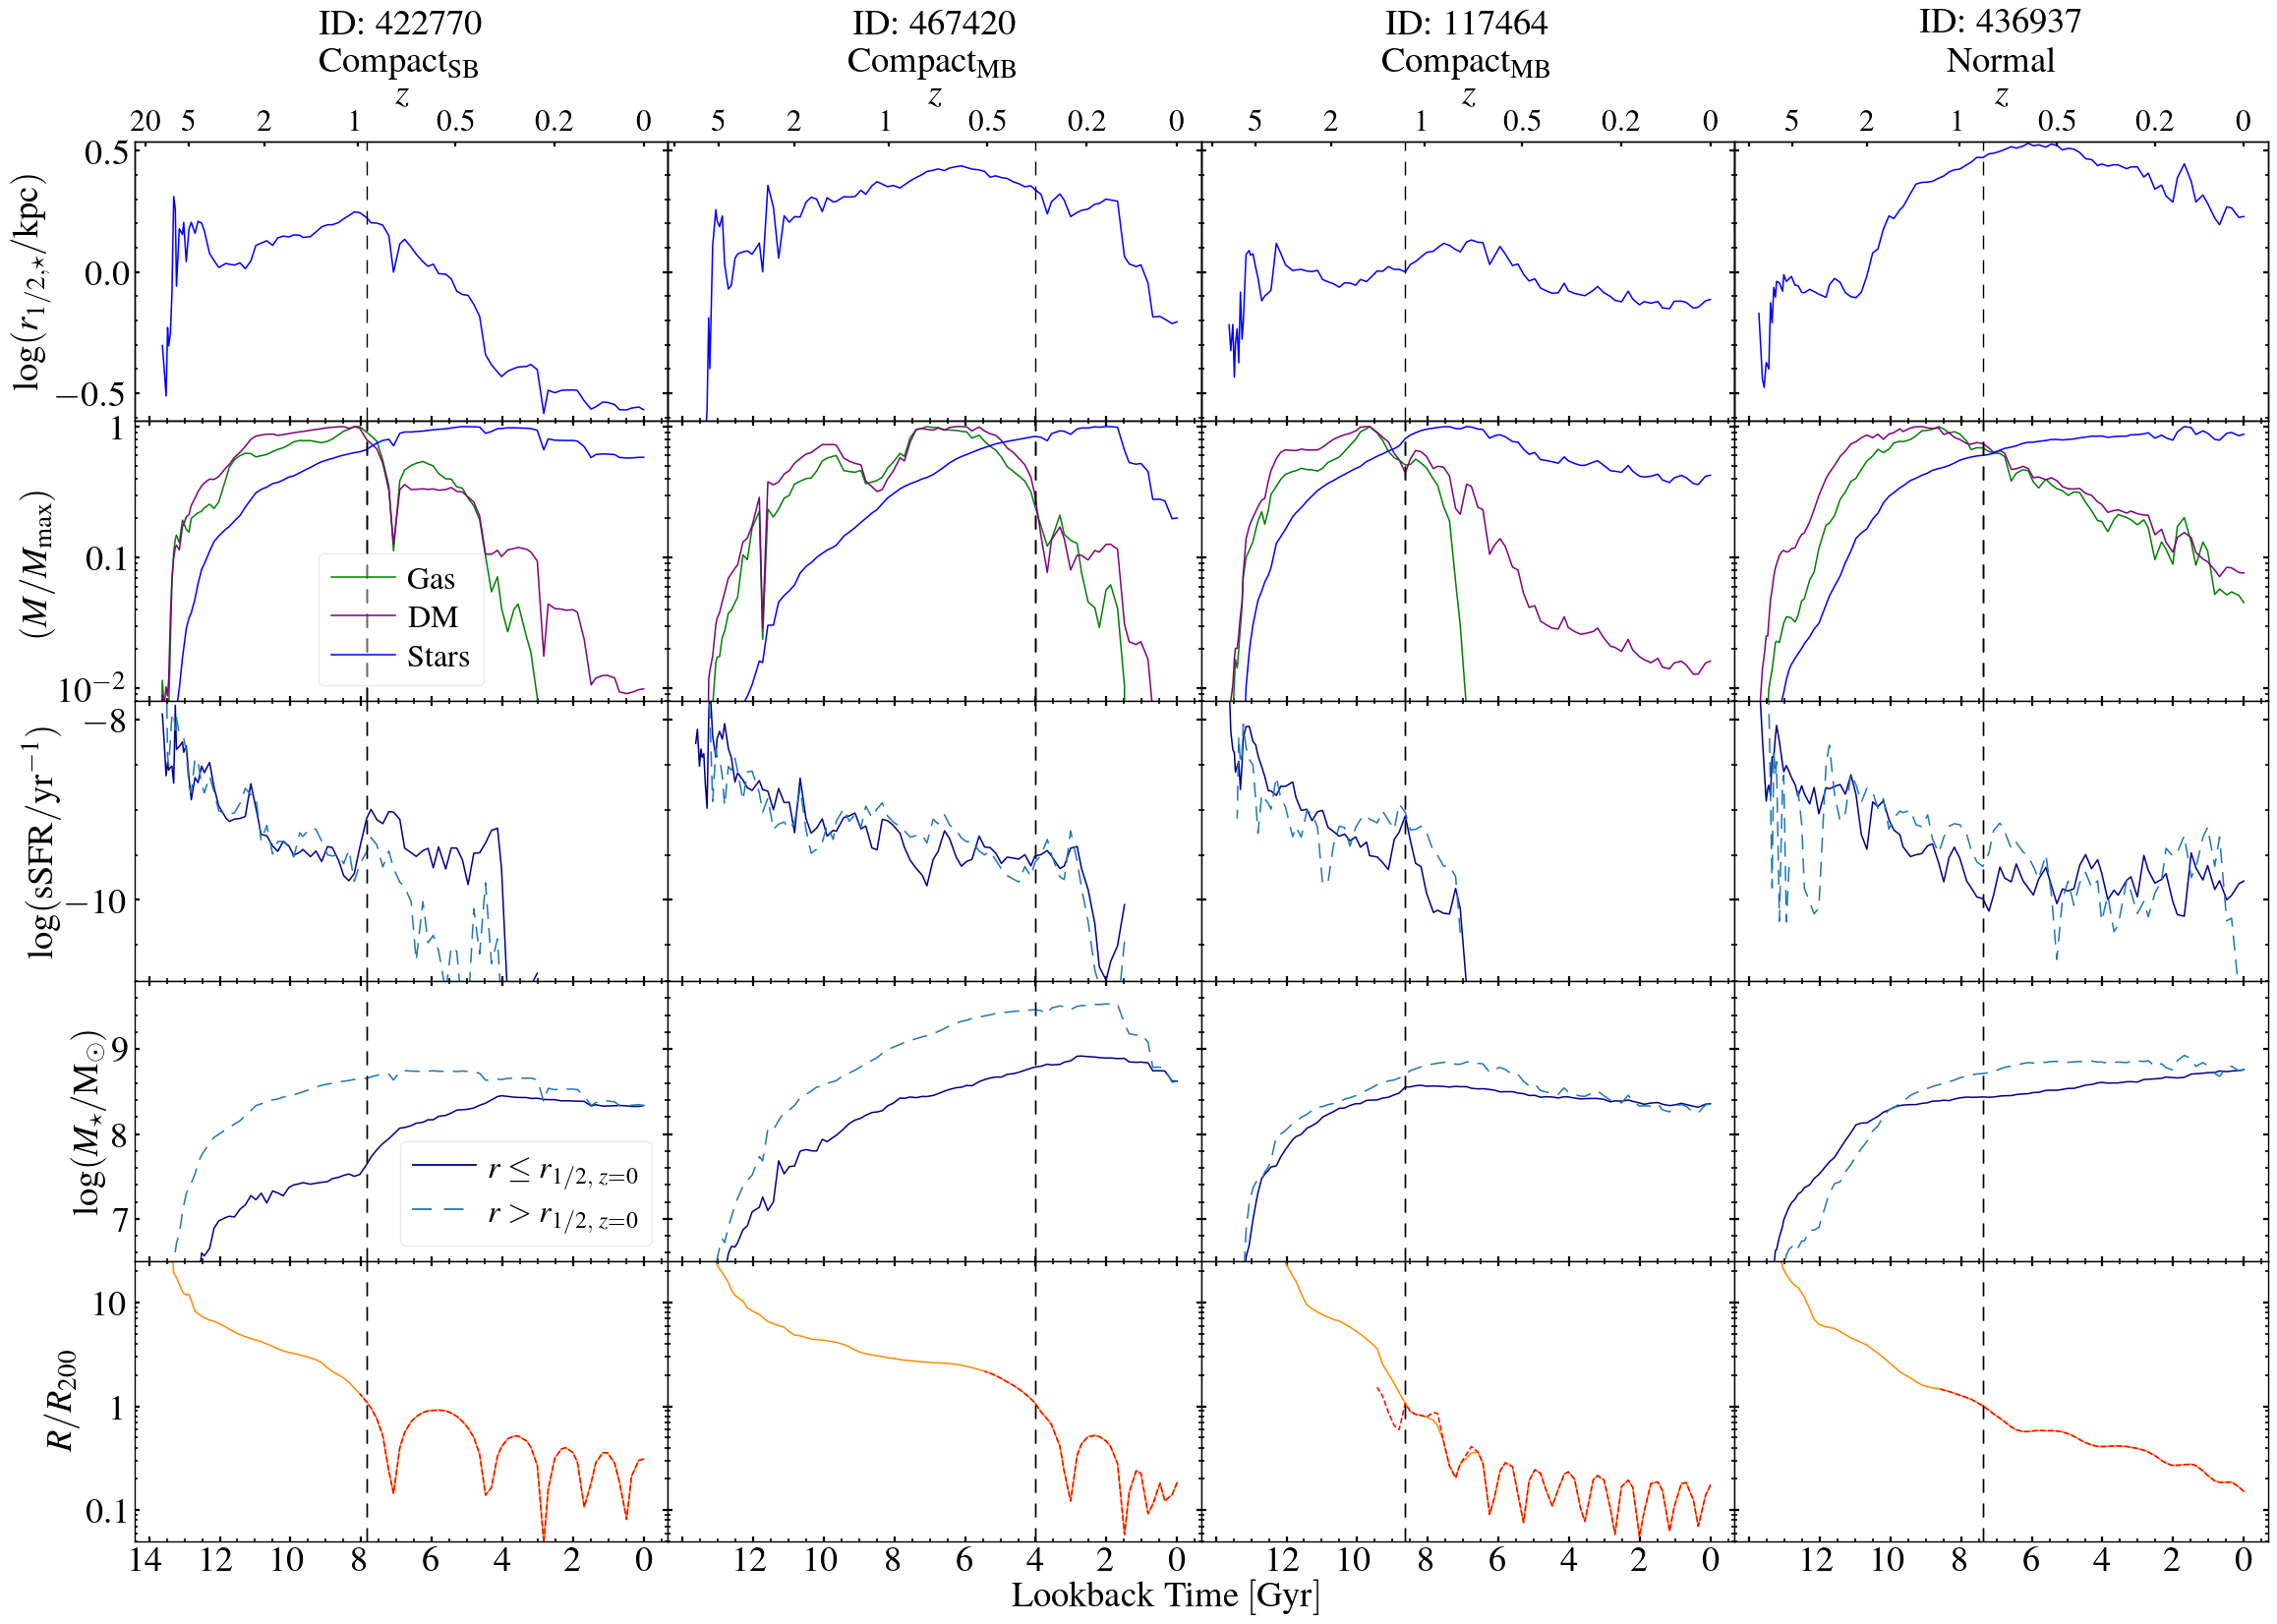

In [8]:
IDs = [422770, 467420, 117464, 436937]

IDsName = ['ID: 422770 \n Compact$_\mathrm{SB}$',  'ID: 467420 \n Compact$_\mathrm{MB}$', 'ID: 117464 \n Compact$_\mathrm{MB}$', 'ID: 436937 \n Normal']

plot.PlotIDsColumns(IDs, [[  'SubhaloHalfmassRadType4'],['Mgas_Norm_Max', 'MDM_Norm_Max', 'Mstar_Norm_Max'], 
                           ['sSFR_In_Rhpkpc', 'sSFR_Above_Rhpkpc'], 
                          ['StarMass_In_Rhpkpc', 'StarMass_Above_Rhpkpc'], ['r_over_R_Crit200', 'r_over_R_Crit200_FirstGroup']], dataMarker=None, dataLine=None,  
                  title=IDsName, xlabelintext=False, lineparams=False,  QuantileError=True, 
           alphaShade=0.3,  linewidth=1.1, fontlabel=26.5,  nboots=100,  ColumnPlot=False, limaxis=False, 
           columnspacing = 0.5, handletextpad = 0.4, labelspacing = 0.3,  Pericenter = False, postext = ['best'],
           lNum = 7, cNum = 3.7,
           NoGas = False, InfallTime = True, GridMake = False,
           ylimmin = [ -0.615, 0.008, -10.9, 6.5, 0.05], ylimmax = [0.54, 1.1, -7.8,  9.8, 25],
           SmallerScale = True,
           Type='Evolution', Xparam='Time', savepath='PaperII/PlotIDColumns', savefigname='Cases_LIMITED', dfName='PaperII', SampleName='Samples',
             legend=True, LegendNames='None',  loc='best', LookBackTime = True,
           bins=10, seed=16010504, TRANSPARENT = False, Softening = False, MaxSizeType = False)

# Fig. 21

SatelliteDMrich: 0.4586124420166015
SatelliteDMpoor: 1.610814094543457
Central: 0.337921142578125
SatelliteDMrich: 0.9693355560302734
SatelliteDMpoor: 1.7243141348266606
Central: 0.4538936614990234


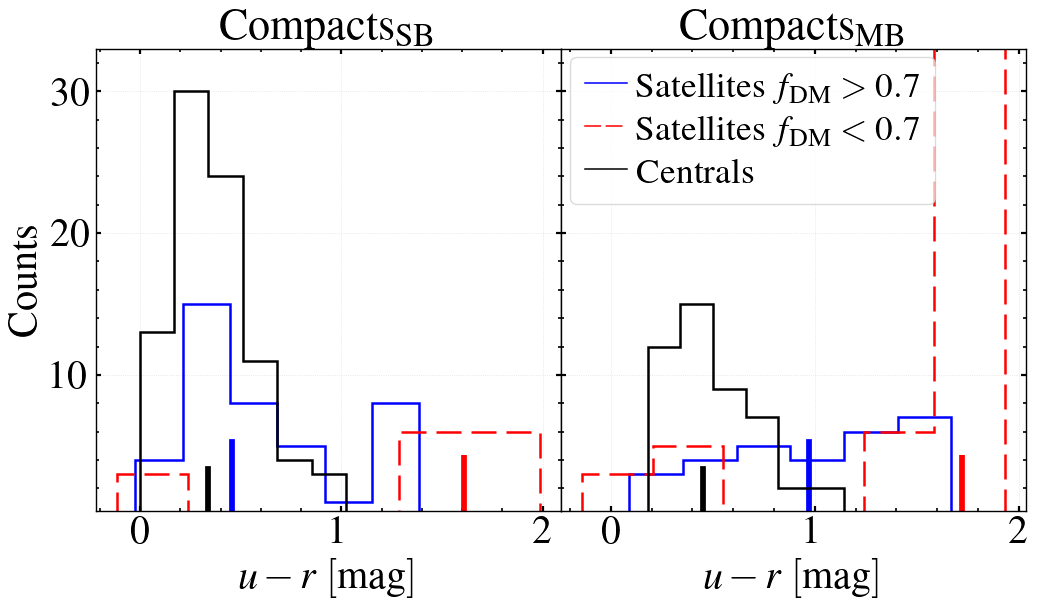

In [10]:
plot.PlotHist(['SatelliteDMrich', 'SatelliteDMpoor', 'Central'], ['SBC', 'MBC'],
              ['U-r'],   Type = 'Sample',
               savepath='PaperII/PlotHist',  savefigname='Color', dfName='PaperII', SampleName='SubfindID_99', 
                density=False, 
                ColumnPlot = True, bins=[[6, 6, 6]], median=True,  legend = True,  legendColumn = True, GridMake = True,
                lNum = 6, cNum = 6, title = ['SBC', 'MBC'], 
                LegendNames = [['SatelliteDMrich', 'SatelliteDMpoor', 'Central']], legpositions = [[1, 0]], loc = [(0.02, 0.665)],
                ylimmin = [0.4, 0.4], ylimmax = [33, 32], #xlimmin = [-0.1, 10.2, 0.08], xlimmax = [3.5, 14.9, 9],
                yscale = 'linear', TRANSPARENT = True, LookBackTime = True, 
                fontlabel=29,
                framealpha=0.7, handlelength = 1.2, handletextpad = 0.25)



# Fig. 22

NameError: name 'PlotScatter' is not defined

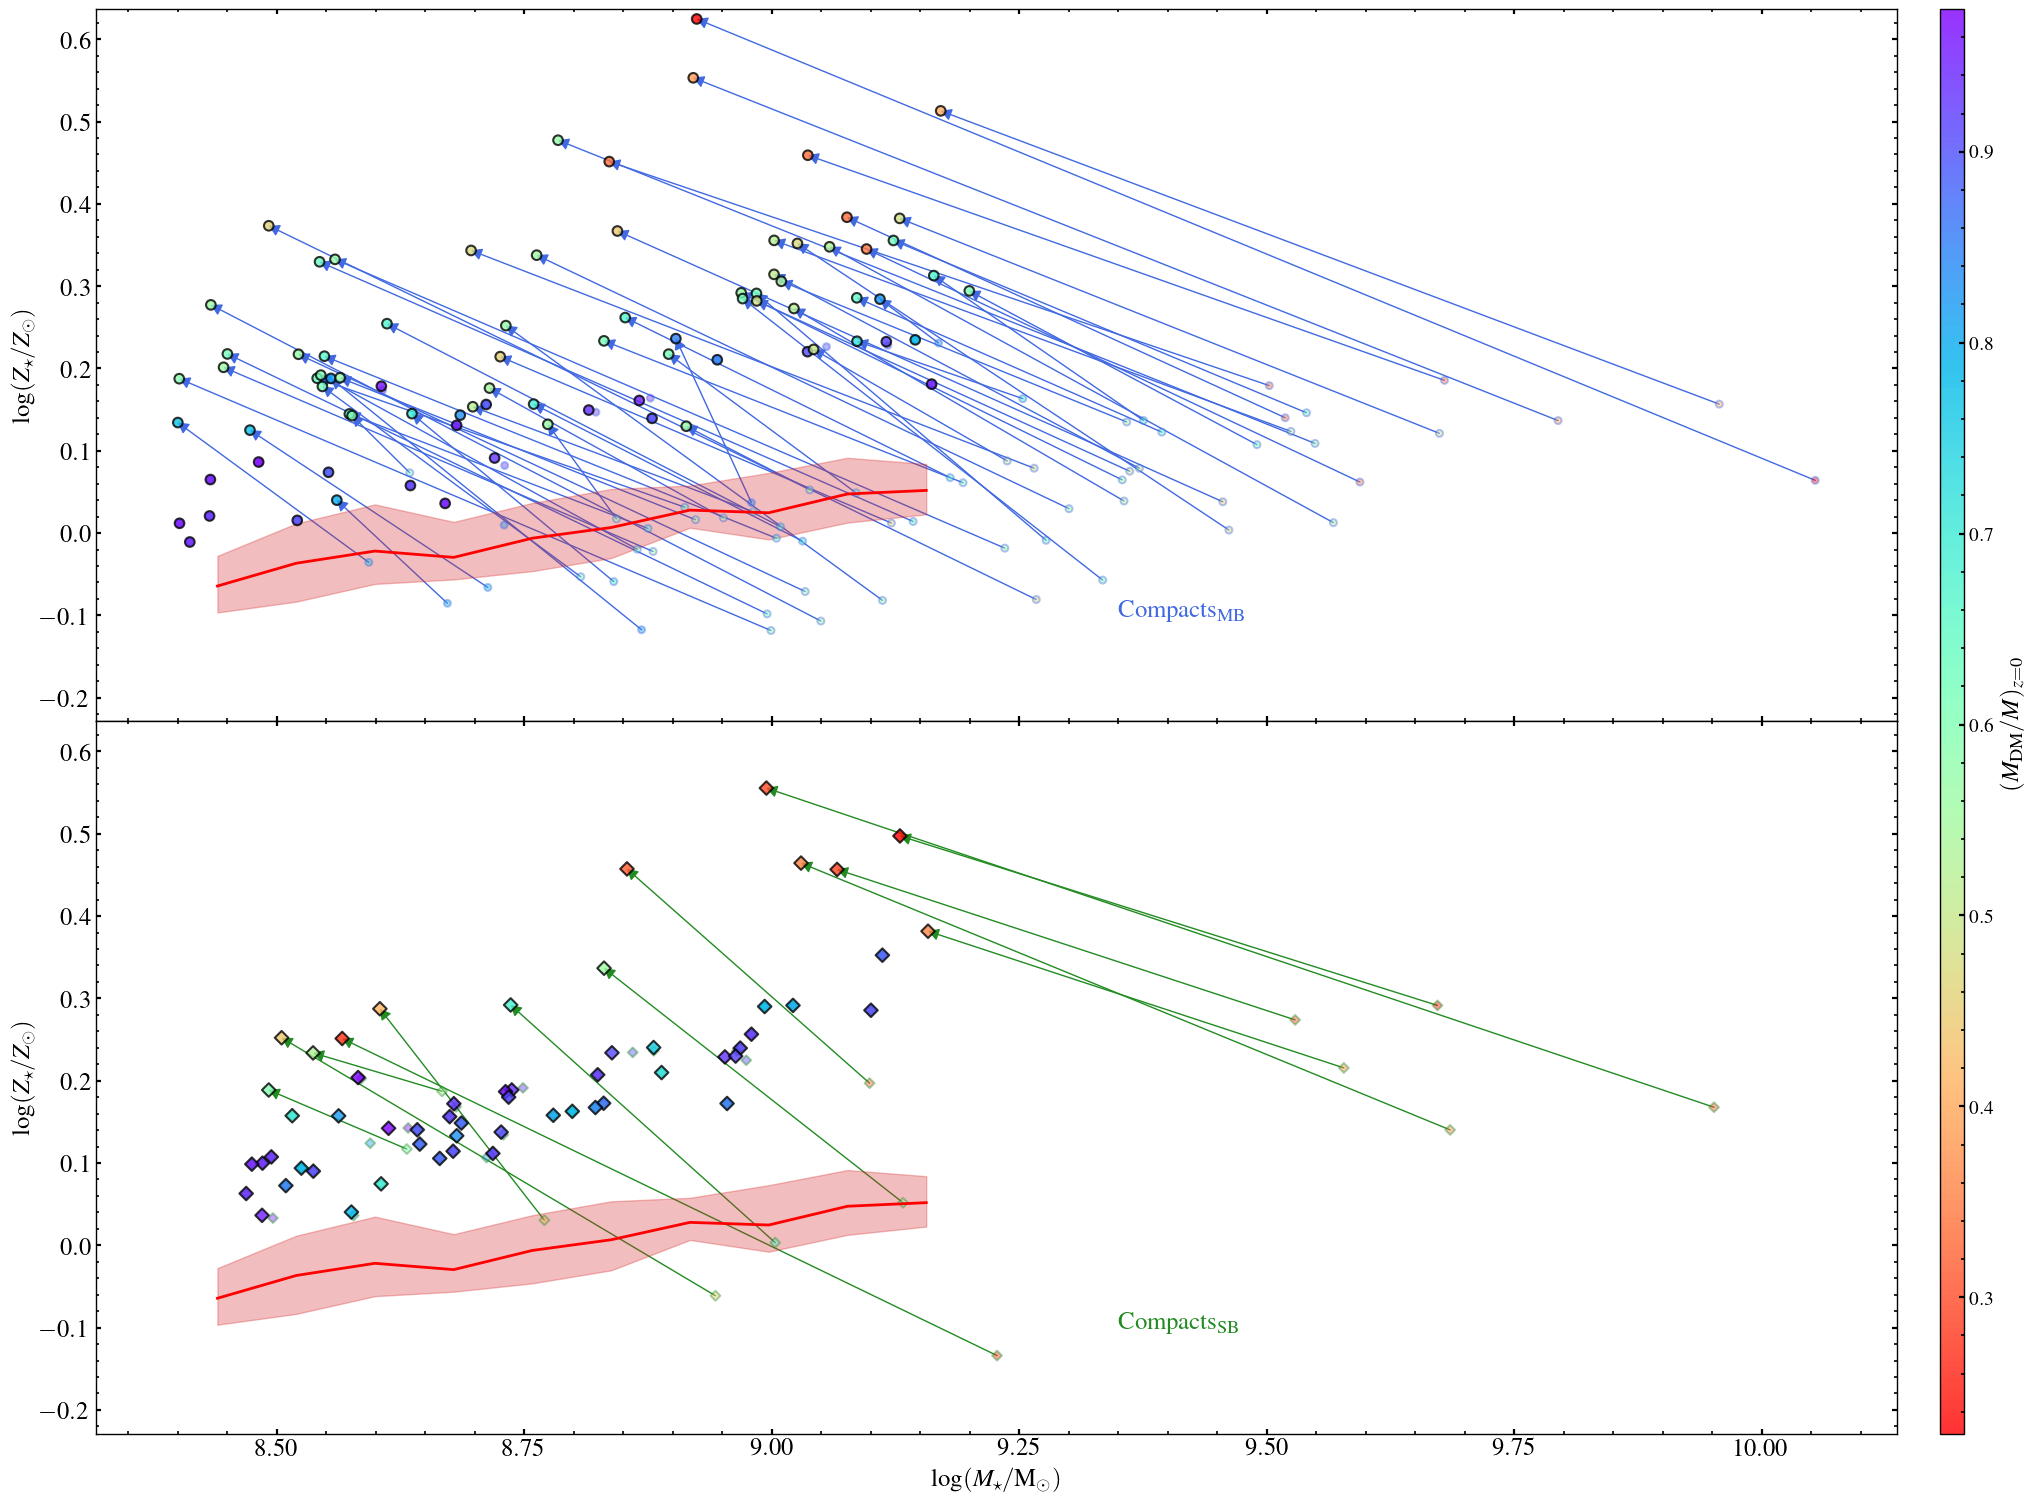

In [9]:
#%%
fig = plt.figure()
plt.rcParams.update({'figure.figsize': (6, 8)})
gs = fig.add_gridspec(2, 1, hspace=0, wspace=0)
axs = gs.subplots(sharex='col', sharey='row')
cmap = plt.cm.get_cmap('rainbow_r')

Zsun =  0.0127 
SBCSatellite = TNG.extractPopulation('SBCSatellite')
MBCSatellite = TNG.extractPopulation('MBCSatellite')
NormalSatellite = TNG.extractPopulation('NormalSatellite')

XSBCMax = np.array([v for v in SBCSatellite.MaxStellarMassInRad[(SBCSatellite.MaxStellarMassInRad != SBCSatellite.logMstarRad_99)].values])
YSBC = np.log10( np.array([v for v in SBCSatellite.StarMetallicity_99[(SBCSatellite.MaxStellarMassInRad != SBCSatellite.logMstarRad_99)].values])/ Zsun  )
XSBC = np.array([v for v in SBCSatellite.logMstarRad_99[(SBCSatellite.MaxStellarMassInRad != SBCSatellite.logMstarRad_99)].values])
YSBCMax = np.log10(np.array([v for v in SBCSatellite.MaxStarMetallicity[(SBCSatellite.MaxStellarMassInRad != SBCSatellite.logMstarRad_99)].values]) / Zsun)


XMBCMax = np.array([v for v in MBCSatellite.MaxStellarMassInRad[(MBCSatellite.MaxStellarMassInRad != MBCSatellite.logMstarRad_99)].values])
YMBC = np.log10(np.array([v for v in MBCSatellite.StarMetallicity_99[(MBCSatellite.MaxStellarMassInRad != MBCSatellite.logMstarRad_99)].values]) / Zsun)
XMBC = np.array([v for v in MBCSatellite.logMstarRad_99[(MBCSatellite.MaxStellarMassInRad != MBCSatellite.logMstarRad_99)].values])
YMBCMax = np.log10(np.array([v for v in MBCSatellite.MaxStarMetallicity[(MBCSatellite.MaxStellarMassInRad != MBCSatellite.logMstarRad_99)].values]) / Zsun)

XNormalMax = np.array([v for v in NormalSatellite.MaxStellarMassInRad[(NormalSatellite.MaxStellarMassInRad != NormalSatellite.logMstarRad_99)].values])
YNormal = np.log10(np.array([v for v in NormalSatellite.StarMetallicity_99[(NormalSatellite.MaxStellarMassInRad != NormalSatellite.logMstarRad_99)].values]) / Zsun)
XNormal = np.array([v for v in NormalSatellite.logMstarRad_99[(NormalSatellite.MaxStellarMassInRad != NormalSatellite.logMstarRad_99)].values])
YNormalMax = np.log10(np.array([v for v in NormalSatellite.MaxStarMetallicity[(NormalSatellite.MaxStellarMassInRad != NormalSatellite.logMstarRad_99)].values]) / Zsun)



for i, v in enumerate(XSBC):
    if abs(XSBC[i] - XSBCMax[i]) > 0.05:
        prop = dict(arrowstyle="-|>,head_width=0.2,head_length=0.35", color = 'forestgreen' ,
            shrinkA=0,shrinkB=0)
        #axs[1].arrow(XSBCMax[i], YSBCMax[i], XSBC[i] - XSBCMax[i] , YSBC[i] - YSBCMax[i] , color = 'forestgreen', shape='full', head_starts_at_zero=False, 
        #             lw = .2, width = 0.0002, head_width = 0.0025, head_length = 0.05)
        axs[1].annotate("", xy=(XSBC[i],YSBC[i]), xytext=(XSBCMax[i], YSBCMax[i]),  color = 'forestgreen',  arrowprops=prop, zorder=0)
        
        #YSBC[i] - YSBCMax[i] - 0.00
for i, v in enumerate(XMBC):
     if abs(XMBC[i] - XMBCMax[i]) > 0.05:
        prop = dict(arrowstyle="-|>,head_width=0.2,head_length=0.35", color = 'royalblue' ,
            shrinkA=0,shrinkB=0)
        #axs[0].arrow(XMBCMax[i], YMBCMax[i], XMBC[i] - XMBCMax[i] ,  YMBC[i] - YMBCMax[i], color = 'royalblue', shape='full', head_starts_at_zero=False, 
        #             lw = .2, width = 0.0002, head_width = 0.0025, head_length = 0.05) 
        axs[0].annotate("", xy=(XMBC[i],YMBC[i]), xytext=(XMBCMax[i], YMBCMax[i]),  color = 'royalblue',  arrowprops=prop, zorder=0)



# Define bins for x
num_bins = 10
bins = np.linspace(min(XNormal), max(XNormal), num_bins + 1)

# Calculate statistics for each bin
bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Center of each bin
median_y = []
percentile_25 = []
percentile_75 = []

for i in range(num_bins):
    bin_y = YNormal[(XNormal >= bins[i]) & (XNormal < bins[i + 1])]
    median_y.append(np.median(bin_y))
    percentile_25.append(np.percentile(bin_y, 25))
    percentile_75.append(np.percentile(bin_y, 75))

# Convert to numpy arrays
median_y = np.array(median_y)
percentile_25 = np.array(percentile_25)
percentile_75 = np.array(percentile_75)

# Median line
axs[1].plot(bin_centers, median_y, color='red', label='Median', lw=2)

# Shaded region (IQR)
axs[1].fill_between(bin_centers, percentile_25, percentile_75, color='tab:red', alpha=0.3)
# Median line
axs[0].plot(bin_centers, median_y, color='red', label='Median', lw=2)

# Shaded region (IQR)
axs[0].fill_between(bin_centers, percentile_25, percentile_75, color='tab:red', alpha=0.3)




sc = axs[1].scatter(XSBCMax,
            YSBCMax ,
            c=SBCSatellite.DMFrac_99[(SBCSatellite.MaxStellarMassInRad != SBCSatellite.logMstarRad_99)].values, 
            edgecolor='forestgreen', alpha=.4, 
            lw = 1.5,
            marker='D', 
            s=3.1*8,
            cmap = cmap)

sc = axs[0].scatter(XMBCMax,
            YMBCMax ,
            c=MBCSatellite.DMFrac_99[(MBCSatellite.MaxStellarMassInRad != MBCSatellite.logMstarRad_99)].values, 
            edgecolor='royalblue', alpha=.4, 
            lw = 1.5,
            marker='o', 
            s=3.1*8,
            cmap = cmap)


sc = axs[1].scatter(XSBC,
            YSBC ,
            c=SBCSatellite.DMFrac_99[(SBCSatellite.MaxStellarMassInRad != SBCSatellite.logMstarRad_99)].values, 
            edgecolor='black', alpha=.8, 
            lw = 1.5,
            marker='D', 
            s=6*8,
            cmap = cmap)

sc = axs[0].scatter(XMBC,
            YMBC ,
            c=MBCSatellite.DMFrac_99[(MBCSatellite.MaxStellarMassInRad != MBCSatellite.logMstarRad_99)].values, 
            edgecolor='black', alpha=.8, 
            lw = 1.5,
            marker='o', 
            s=6*8,
            cmap = cmap)


cb = fig.colorbar(sc,  ax=axs.ravel().tolist(), pad=0.02,  aspect=60)
cb.set_label(r'$(M_\mathrm{DM}/ M)_{z = 0}$', fontsize = 18)

plt.xlabel('$\log(M_\star/\mathrm{M}_\odot)$', fontsize = 18)
axs[0].set_ylabel(r'$\log( Z_\star / Z_\odot)$', fontsize = 18)
axs[1].set_ylabel(r'$\log( Z_\star / Z_\odot)$', fontsize = 18)
axs[0].set_ylim(np.log10(0.0075 / Zsun), np.log10(0.055 / Zsun))
axs[1].set_ylim(np.log10(0.0075 / Zsun), np.log10(0.055 / Zsun))
axs[1].tick_params(labelsize=0.99*18)
axs[0].tick_params(labelsize=0.99*18)


axs[0].text(9.35, -0.1,'Compacts$_\mathrm{MB}$', fontsize = 18,   color = 'royalblue')
axs[1].text(9.35, -0.1, 'Compacts$_\mathrm{SB}$', fontsize = 18,   color ='forestgreen')

plt.savefig(os.getenv('HOME')+'/TNG_Analyzes/Figs/TNG50/PaperII/PlotScatter/Zmetallicty.pdf', bbox_inches='tight',)

#%%

PlotScatter(['MBCLoseTheirGas', 'SBCLoseTheirGas', 'SBCDontLoseTheirGas', 'MBCDontLoseTheirGas'], ['SatelliteDMpoor'], 'sSFRTrueInner_BeforeEntry', ['sSFRTrueInner_Entry_to_Nogas'],  Type='z0', snap=[99],
title=['DMpoor'], medianBins=False, medianAll=False, xlabelintext=False, All=None, GridMake = True, 
COLORBAR = ['logStarZ_99'],
               legend=True,LegendNames=[[ 'MBCEmptyScatter', 'SBCEmptyScatter', 'DontLoseTheirGasColorbarScatter', 'LoseTheirGasColorbarScatter',]], TRANSPARENT = False,  
               cmap = 'plasma',
               alphaScater=1.,   alphaShade=0.3,  linewidth=1.2, 
               fontlabel=17.7,
               m='o', msizet=4.5, quantile=0.95,framealpha = 0.85, q = 0.95,
               MarkerSizes = None,
               lNum = 6, cNum = 6,
               legpositions = [[0, 0]], 
               ylimmin = [-11.1], ylimmax = [-8.8],xlimmin = [-11.2], xlimmax = [-8.1],
               columnspacing = 0.001, handletextpad = -0.4, labelspacing = 0.3, loc = [(0.01, 0.01)],
               savepath='PaperII/PlotScatter',  savefigname='sSFR_Check', dfName='PaperII', SampleName='Samples',
               bins=10, seed=16010504, mult = 4.1)

# Fig. 23

In [ ]:
plot.PlotScatter(['MBC', 'SBC'], ['SatelliteDMpoor'], 'Relative_logInnerZ_At_Entry', 
                 ['Relative_logZ_At_Entry'],  Type='z0', snap=[99], COLORBAR = ['logStarZ_99'],
title=['DMpoor'], medianBins=False, medianAll=False, xlabelintext=False, All=None, GridMake = False, 
               legend=True,LegendNames=[[ 'MBCEmptyScatter', 'SBCEmptyScatter']], TRANSPARENT = False,  
               cmap = 'bwr_r',
               alphaScater=1.,   alphaShade=0.3,  linewidth=1.2, 
               fontlabel=16,
               m='o', msizet=4.5, quantile=0.95,framealpha = 0.85, q = 0.95,
               ylimmin = [-0.25], ylimmax = [1.05],xlimmin = [0.0], xlimmax = [0.9],
               MarkerSizes = None,
               lNum = 6, cNum = 6,
               legpositions = [[0, 0]],
               columnspacing = 0.5, handletextpad = -0.4, labelspacing = 0.3, loc = [(0.17, 0.2)],
               savepath='PaperII/PlotScatter',  savefigname='Metallicity', dfName='PaperII', SampleName='Samples',
               bins=10, seed=16010504, mult = 4.1)

# Fig. A1


 Type:  Satellite


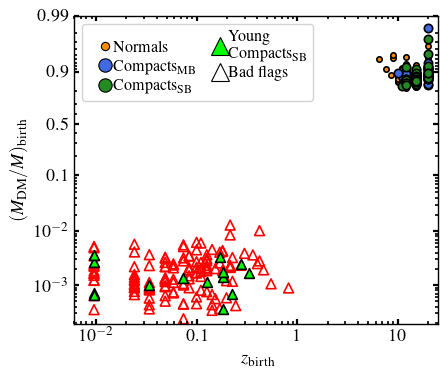

In [11]:
plot.PlotScatter(['Normal','MBC', 'SBC',  'BadFlag', 'SBCBornYoung'], ['Satellite'], 'z_Birth', 'DMFrac_Birth',  Type='z0', snap=[99],
 title=False, medianBins=False, medianAll=False, xlabelintext=False, All=None,
                legend=True, LegendNames=[['NormalBlackLineScatter', 'MBCBlackLineScatter', 'SBCBlackLineScatter', 'SBCBornYoungBlackLineScatter', 'BadFlagBlackLineScatter']],  TRANSPARENT = False, COLORBAR = None, medianDot = False, 
                alphaScater=1.,   alphaShade=0.3,  linewidth=1.2, 
                fontlabel=13.2,  
                m='o', msizet=4.5, quantile=0.95,framealpha = 0.85, q = 0.95,
                MarkerSizes = None, GridMake = False,
                lNum = 4, cNum = 4.7, 
                ylimmin = [1.9e-4], ylimmax = [0.99], xlimmin = [6e-3], xlimmax = [25],  
                legpositions = [[0, 0]],
                columnspacing = 0.5, handletextpad = -0.5, labelspacing = 0.3, loc = ['best'],
                savepath='PaperII/PlotScatter',  savefigname='BADFlag', dfName='PaperII', SampleName='Samples', cmap = 'inferno',
                bins=10, seed=16010504, mult = 4.1)


# Fig. A2

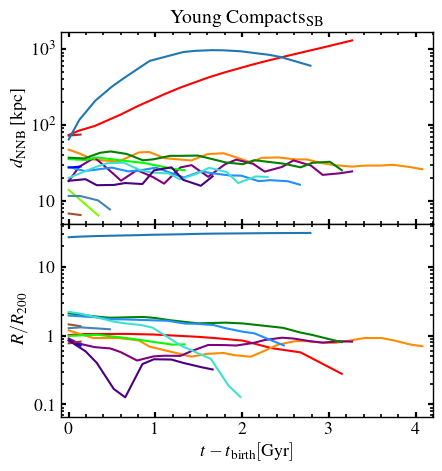

In [13]:
SBCYoungIDs = np.array([  327, 117361, 167459, 167466, 167504, 242823, 242824, 242825, 264957, 355743, 355744, 371132, 413377, 923816])
plot.PlotID(['SBCBornYoung'],  ['rToRNearYoung', 'r_over_R_Crit200'], [SBCYoungIDs], 
            Type = 'Evolution', Xparam = ['tsincebirth', 'tsincebirth']  ,
            savepath='PaperII/PlotID',  savefigname='Young', dfName='PaperII', SampleName='SubfindID_99',  LookBackTime = True,
            #ylimmin = [-0.62, -11.2, 0.1], ylimmax = [0.5, -7.8, 2.15], xlimmin = None, xlimmax = None,
            lNum = 2.5, cNum = 4.8, GridMake = False,
            ColumnPlot=False, limaxis=False, xlabelintext=False, TRANSPARENT = True, legend=False, title=['Young Compacts$_\mathrm{SB}$'], lineparams=False, 
            loc='best', QuantileError = False, linewidth = 1.5, fontlabel=13,  
            Softening = True, sSFRMedian = False)

# Fig. B1


[13.802819 13.666329 13.462742 13.327794 13.126561 12.993212 12.794419
 12.662724 12.466454 12.336469 12.142804 11.950741 11.823602 11.634269
 11.508976 11.32245  11.137642 11.015405 10.833517 10.653412 10.534345
 10.298646 10.182027 10.008651  9.837158  9.723884  9.555567  9.389178
  9.224732  9.062243  8.901722  8.743182  8.586632  8.432081  8.279538
  8.079279  7.93144   7.785623  7.641832  7.45326   7.314194  7.131918
  6.997566  6.821561  6.691897  6.522119  6.355871  6.193132  6.073364
  5.878068  5.725682  5.576682  5.43103   5.288689  5.115354  4.980306
  4.815949  4.656455  4.501729  4.292939  4.206193  4.037511  3.901735
  3.744403  3.593009  3.447374  3.284507  3.128954  2.980437  2.838681
  2.684607  2.538618  2.383569  2.237743  2.145398  1.944184  1.811915
  1.688509  1.540402  1.466045  1.365945  1.28166   1.177255  1.11239
  1.036282  0.965356  0.931726  0.843642  0.763859  0.732013  0.686709
  0.639645  0.595801  0.54713   0.516909  0.474674  0.417697  0.370175
  0.270

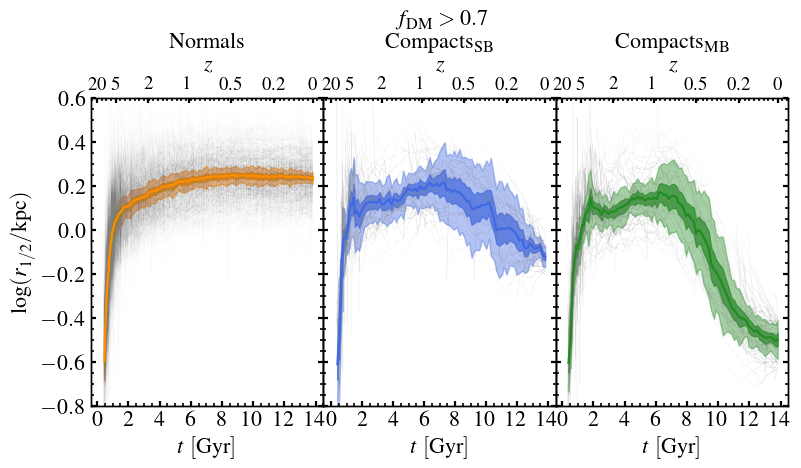

In [14]:
plot.PlotIDsAllTogether(['NormalSatelliteDMrich','MBCSatelliteDMrich', 'SBCSatelliteDMrich'],['SubhaloHalfmassRadType4'],ylimmin = [-0.8], ylimmax = [0.6], title = ['Normals', '$f_\mathrm{DM} > 0.7$ \n Compacts$_\mathrm{SB}$', 'Compacts$_\mathrm{MB}$'], MedianPlot = True,
lNum = 4, cNum = 3, ColorMaps = [plt.get_cmap('Oranges'), plt.get_cmap('Blues'), plt.get_cmap('Greens')],
alphaShade=0.3,  linewidth=1.1,  fontlabel=16,  nboots=100,  
 columnspacing = 0.5, handletextpad = 0.4, labelspacing = 0.3, 
bins=10, seed=16040105, savepath='fig/PlotIDsAllTogether', savefigname='RandomLines',
dfName='PaperII')

# Fig. C1


 Type:  SatelliteDMpoor


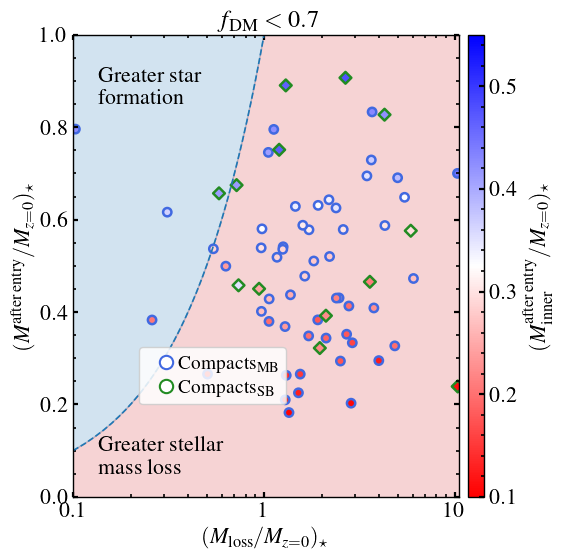

In [15]:
plot.PlotScatter(['MBC', 'SBC'], ['SatelliteDMpoor'], 'FracStarLoss', 
                 ['FracStarAfterEntry'],  Type='z0', snap=[99], COLORBAR = ['FracStarAfterEntry_Inner'],
title=['DMpoor'], medianBins=False, medianAll=False, xlabelintext=False, All=None, GridMake = False, 
               legend=True,LegendNames=[[ 'MBCEmptyScatter', 'SBCEmptyScatter']], TRANSPARENT = False,  
               cmap = 'bwr_r',
               alphaScater=1.,   alphaShade=0.3,  linewidth=1.2, 
               fontlabel=16,
               m='o', msizet=4.5, quantile=0.95,framealpha = 0.85, q = 0.95,
               ylimmin = [0.], ylimmax = [1.],xlimmin = [0.1], xlimmax = [10.5],
               MarkerSizes = None,
               lNum = 6, cNum = 6,
               legpositions = [[0, 0]],
               columnspacing = 0.5, handletextpad = -0.4, labelspacing = 0.3, loc = [(0.17, 0.2)],
               savepath='PaperII/PlotScatter',  savefigname='FracLoss', dfName='PaperII', SampleName='Samples',
               bins=10, seed=16010504, mult = 4.1)

# Fig. E1

IDs = np.array([63990, 64002, 96853, 117357, 229992, 294887, 294895])
IDsName = [str(i) for i in IDs]

plot.PlotIDsColumns(IDs, [['SubhaloHalfmassRadType0', 'SubhaloHalfmassRadType1', 'SubhaloHalfmassRadType4'], ['Mgas_Norm_Max', 'MDM_Norm_Max', 'Mstar_Norm_Max'], 
                           ['sSFR_In_Rhpkpc', 'sSFR_Above_Rhpkpc'], 
                          ['StarMass_In_Rhpkpc', 'StarMass_Above_Rhpkpc'], ['r_over_R_Crit200', 'r_over_R_Crit200_FirstGroup']], dataMarker=None, dataLine=None,  
                  title=IDsName, xlabelintext=False, lineparams=False,  QuantileError=True, 
           alphaShade=0.3,  linewidth=1.1, fontlabel=26.5,  nboots=100,  ColumnPlot=False, limaxis=False, 
           columnspacing = 0.5, handletextpad = 0.4, labelspacing = 0.3,  Pericenter = False, postext = ['best'],
           lNum = 7, cNum = 3.7, PhasingPlot = True,
           NoGas = False, InfallTime = True, GridMake = False,
           ylimmin = [-0.62, 0.008, -10.9, 6.5, 0.05], ylimmax = [1.65, 1.1, -7.8,  10.1, 25],
           SmallerScale = True,
           Type='Evolution', Xparam='Time', savepath='PaperII/PlotIDColumns', savefigname='test', dfName='PaperII', SampleName='Samples',
             legend=True, LegendNames='None',  loc='best', LookBackTime = True,
           bins=10, seed=16010504, TRANSPARENT = False, Softening = False, MaxSizeType = False)